Author: Cheng-Pang (Tego) Chang

# Q1. 
To analyze the quality of the IP data offered/presented in the sample TS Sample DS candidates.csv ; to perform comparative analysis of the two data sources in order to make conclusions about the accuracy of the data, i.e. to make the decision (if possible) which data source is the most accurate and recommended for the further research,

In [125]:
import pandas as pd
import numpy as np

In [126]:
df_ts = pd.read_csv("./TS_Sample_DS_candidates.csv", encoding='latin-1')
df_ts.head()

fraud_label           utc_time_stamp                 phone_number_hash  \
0       legit  05/01/2017 00:00:04.493  a090dcb8615eb80cfc6782092a598352   
1       fraud  05/01/2017 00:00:06.577  a6fbb057e5a85f6c9fea7216a84859dd   
2       legit  05/01/2017 00:05:03.850  9f8c3f5cae001698989cd4a691f4ef39   
3       legit  05/01/2017 00:06:08.760  090e49e3dea4040855e84c7703721ca9   
4       fraud  05/01/2017 00:06:46.483  5d3c3aefe8f5d7ff62be7a79a30f7261   

  country_iso2                   ip_address_hash start_ip_source1  \
0           US  88383218c90dd4b355399a8df04cd54d      66.87.76.76   
1           BR  730baa254a10bb2c8fb1c9e72ecbbdbe  186.237.158.116   
2           EG  e70a2957367afa9b34f9b3d734024949     41.217.160.0   
3           TW  226484c53a9b312420339f52a2e77729        39.12.0.0   
4           BR  90f7f57bfddc8744d9d7b1668b8679e3    170.79.211.36   

    end_ip_source1 continent_source1 country_source1 country_code_source1  \
0      66.87.76.79     north america   united states                   us   
1  186.237.158.135     south america          brazil                   br   
2   41.217.173.255            africa           egypt                   eg   
3     39.12.47.255              asia          taiwan                   tw   
4    170.79.211.39     south america          brazil                   br   

   ...                                  isp_source2  \
0  ...                                   Sprint PCS   
1  ...               Giganet Internet E Informatica   
2  ...                                   Link Egypt   
3  ...            Far EasTone Telecommunication Co.   
4  ...  Netion Soluções em Internet Via Rádio Ltda.   

                          organization_source2  organization_type_source2  \
0                                   Sprint PCS                   cellular   
1               Giganet Internet E Informatica                residential   
2                          NET@NET DSL Network                residential   
3           Far EastTone Telecommunication Co.                   cellular   
4  Netion Soluções em Internet Via Rádio Ltda.                residential   

           domain_source2  proxy_is_legitimate_source2  \
0             spcsdns.net                            0   
1  giganetinternet.com.br                            0   
2                     NaN                            0   
3              fetnet.net                            0   
4                     NaN                            0   

   proxy_is_anonymous_source2 proxy_is_anonymous_vpn_source2  \
0                           0                              0   
1                           0                              0   
2                           0                              0   
3                           0                              0   
4                           0                              0   

  proxy_is_hosting_provider_source2 proxy_is_public_source2  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

  proxy_is_tor_source2  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  

[5 rows x 51 columns]

In [127]:
df_ts.shape

(48474, 51)

In [128]:
df_ts.columns

Index(['fraud_label', 'utc_time_stamp', 'phone_number_hash', 'country_iso2',
       'ip_address_hash', 'start_ip_source1', 'end_ip_source1',
       'continent_source1', 'country_source1', 'country_code_source1',
       'country_cl_source1', 'state_source1', 'state_cl_source1',
       'city_source1', 'city_cl_source1', 'time_zone_source1', 'home_source1',
       'connection_type_source1', 'line_speed_source1',
       'ip_routing_type_source1', 'asn_source1', 'carrier_source1',
       'organization_source1', 'organization_type_source1', 'sld_source1',
       'tld_source1', 'hosting_facility_source1', 'anonymizer_status_source1',
       'proxy_last_detected_source1', 'proxy_type_source1',
       'proxy_level_source1', 'continent_source2', 'country_source2',
       'country_code_source2', 'country_cl_source2', 'city_source2',
       'city_cl_source2', 'time_zone_source2', 'connection_type_source2',
       'asn_source2', 'carrier_source2', 'isp_source2', 'organization_source2',
       'orga

List the different columns between the two sources, and check the length


In [129]:
# Different column comparison:

print ("Source 1: length of different columns",
    len(['start_ip_source1', 'end_ip_source1', 'state_source1', 'state_cl_source1', 'home_source1', 'line_speed_source1', \
    'ip_routing_type_source1', 'sld_source1', 'tld_source1', 'hosting_facility_source1', 'anonymizer_status_source1', \
    'proxy_last_detected_source1', 'proxy_type_source1', 'proxy_level_source1'])
)

print ("Source 2: length of different columns",
len(['isp_source2', 'domain_source2','proxy_is_legitimate_source2', 'proxy_is_anonymous_source2','proxy_is_anonymous_vpn_source2', \
    'proxy_is_hosting_provider_source2','proxy_is_public_source2', 'proxy_is_tor_source2'])
)

Source 1: length of different columns 14
Source 2: length of different columns 8


In [130]:
col_comm = list(df_ts.columns[:5])
col_s1 = [col for col in df_ts.columns if col.endswith("source1")]
col_s2 = [col for col in df_ts.columns if col.endswith("source2")]

In [131]:
df_ts_s1 = df_ts[col_comm + col_s1]
df_ts_s1.head()

fraud_label           utc_time_stamp                 phone_number_hash  \
0       legit  05/01/2017 00:00:04.493  a090dcb8615eb80cfc6782092a598352   
1       fraud  05/01/2017 00:00:06.577  a6fbb057e5a85f6c9fea7216a84859dd   
2       legit  05/01/2017 00:05:03.850  9f8c3f5cae001698989cd4a691f4ef39   
3       legit  05/01/2017 00:06:08.760  090e49e3dea4040855e84c7703721ca9   
4       fraud  05/01/2017 00:06:46.483  5d3c3aefe8f5d7ff62be7a79a30f7261   

  country_iso2                   ip_address_hash start_ip_source1  \
0           US  88383218c90dd4b355399a8df04cd54d      66.87.76.76   
1           BR  730baa254a10bb2c8fb1c9e72ecbbdbe  186.237.158.116   
2           EG  e70a2957367afa9b34f9b3d734024949     41.217.160.0   
3           TW  226484c53a9b312420339f52a2e77729        39.12.0.0   
4           BR  90f7f57bfddc8744d9d7b1668b8679e3    170.79.211.36   

    end_ip_source1 continent_source1 country_source1 country_code_source1  \
0      66.87.76.79     north america   united states                   us   
1  186.237.158.135     south america          brazil                   br   
2   41.217.173.255            africa           egypt                   eg   
3     39.12.47.255              asia          taiwan                   tw   
4    170.79.211.39     south america          brazil                   br   

   ...                              carrier_source1  \
0  ...       sprint personal communications systems   
1  ...               giganet internet e informatica   
2  ...                                  linkdotnet    
3  ...   far easttone telecommunication co.%2C ltd.   
4  ...  netion solu  es em internet via r dio ltda.   

                          organization_source1  organization_type_source1  \
0                           sprint chicago pop  Internet Service Provider   
1               giganet internet e informatica                        NaN   
2                          net@net dsl network                        NaN   
3               panchiao   taipei hsien taiwan         Telecommunications   
4  netion solu  es em internet via r dio ltda.                        NaN   

       sld_source1  tld_source1  hosting_facility_source1  \
0          spcsdns          net                     False   
1  giganetinternet       com.br                     False   
2              NaN          NaN                     False   
3           fetnet          net                     False   
4              NaN          NaN                     False   

  anonymizer_status_source1 proxy_last_detected_source1 proxy_type_source1  \
0                       NaN                         NaN                NaN   
1                       NaN                         NaN                NaN   
2                       NaN                         NaN                NaN   
3                       NaN                         NaN                NaN   
4                       NaN                         NaN                NaN   

  proxy_level_source1  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  

[5 rows x 31 columns]

In [132]:
df_ts_s2 = df_ts[col_comm + col_s2]
df_ts_s2.head()

fraud_label           utc_time_stamp                 phone_number_hash  \
0       legit  05/01/2017 00:00:04.493  a090dcb8615eb80cfc6782092a598352   
1       fraud  05/01/2017 00:00:06.577  a6fbb057e5a85f6c9fea7216a84859dd   
2       legit  05/01/2017 00:05:03.850  9f8c3f5cae001698989cd4a691f4ef39   
3       legit  05/01/2017 00:06:08.760  090e49e3dea4040855e84c7703721ca9   
4       fraud  05/01/2017 00:06:46.483  5d3c3aefe8f5d7ff62be7a79a30f7261   

  country_iso2                   ip_address_hash continent_source2  \
0           US  88383218c90dd4b355399a8df04cd54d     North America   
1           BR  730baa254a10bb2c8fb1c9e72ecbbdbe     South America   
2           EG  e70a2957367afa9b34f9b3d734024949            Africa   
3           TW  226484c53a9b312420339f52a2e77729              Asia   
4           BR  90f7f57bfddc8744d9d7b1668b8679e3     South America   

  country_source2 country_code_source2 country_cl_source2  city_source2  ...  \
0   United States                   US               0.99       Chicago  ...   
1          Brazil                   BR               0.99      Cianorte  ...   
2           Egypt                   EG                0.8         Tanta  ...   
3          Taiwan                   TW                0.7      Taichung  ...   
4          Brazil                   BR               0.99  Praia Grande  ...   

                                   isp_source2  \
0                                   Sprint PCS   
1               Giganet Internet E Informatica   
2                                   Link Egypt   
3            Far EasTone Telecommunication Co.   
4  Netion Soluções em Internet Via Rádio Ltda.   

                          organization_source2 organization_type_source2  \
0                                   Sprint PCS                  cellular   
1               Giganet Internet E Informatica               residential   
2                          NET@NET DSL Network               residential   
3           Far EastTone Telecommunication Co.                  cellular   
4  Netion Soluções em Internet Via Rádio Ltda.               residential   

           domain_source2 proxy_is_legitimate_source2  \
0             spcsdns.net                           0   
1  giganetinternet.com.br                           0   
2                     NaN                           0   
3              fetnet.net                           0   
4                     NaN                           0   

  proxy_is_anonymous_source2 proxy_is_anonymous_vpn_source2  \
0                          0                              0   
1                          0                              0   
2                          0                              0   
3                          0                              0   
4                          0                              0   

  proxy_is_hosting_provider_source2 proxy_is_public_source2  \
0                                 0                       0   
1                                 0                       0   
2                                 0                       0   
3                                 0                       0   
4                                 0                       0   

   proxy_is_tor_source2  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  

[5 rows x 25 columns]

In [133]:
print ("Data source 1 examinations:")
print ("Number of columns have missing data: ", len(df_ts_s1.isna().sum()[df_ts_s1.isna().sum() != 0]))
print ("Number of columns have missing data more than 10% of the entire dataset: ", \
        len(df_ts_s1.isna().sum()[df_ts_s1.isna().sum() >= len(df_ts_s1) * 0.1]))
print ("Number of columns have missing data more than 50% of the entire dataset: ", \
        len(df_ts_s1.isna().sum()[df_ts_s1.isna().sum() >= len(df_ts_s1) * 0.5]))
df_ts_s1.isna().sum()[df_ts_s1.isna().sum() != 0]

Data source 1 examinations:
Number of columns have missing data:  16
Number of columns have missing data more than 10% of the entire dataset:  11
Number of columns have missing data more than 50% of the entire dataset:  4


country_iso2                       9
state_source1                    641
city_source1                     641
home_source1                   10196
connection_type_source1         6630
line_speed_source1              6630
ip_routing_type_source1         6483
carrier_source1                  200
organization_source1             136
organization_type_source1      11256
sld_source1                    14636
tld_source1                    14325
anonymizer_status_source1      44316
proxy_last_detected_source1    44316
proxy_type_source1             44316
proxy_level_source1            44316
dtype: int64

In [134]:
print ("Data source 2 examinations:")
print ("Number of columns have missing data: ", len(df_ts_s2.isna().sum()[df_ts_s2.isna().sum() != 0]))
print ("Number of columns have missing data more than 10% of the entire dataset: ", \
        len(df_ts_s2.isna().sum()[df_ts_s2.isna().sum() >= len(df_ts_s2) * 0.1]))
print ("Number of columns have missing data more than 50% of the entire dataset: ", \
        len(df_ts_s2.isna().sum()[df_ts_s2.isna().sum() >= len(df_ts_s2) * 0.5]))
df_ts_s2.isna().sum()[df_ts_s2.isna().sum() != 0]

Data source 2 examinations:
Number of columns have missing data:  12
Number of columns have missing data more than 10% of the entire dataset:  3
Number of columns have missing data more than 50% of the entire dataset:  0


country_iso2                     9
continent_source2               41
country_source2                 89
country_code_source2            98
city_source2                  5831
city_cl_source2               5832
time_zone_source2              778
connection_type_source2        156
asn_source2                      7
carrier_source2                 19
organization_type_source2        9
domain_source2               16780
dtype: int64

## Answer 1

1. Though data source 1 has more features compared with data source 2, it also comes with more columns of missing values (many with missin values more than 10% or even over 90%). 

2. Data source 1 has lots of missing values in the proxy relevant attributes, *'anonymizer_status_source1', 'proxy_last_detected_source1', 'proxy_type_source1', and 'proxy_level_source1'*, which might represent important characteristics of an IP address. This missing might be crucial. 

Based on above, we will more likely recommend data source 2 for the following research. 

# Q2. 

To conduct the research regarding the predictive power of the IP data (from the sample mentioned above) for the fraud detection problem (i.e. predictive power regarding the target variable fraud label),

## 1. Preprocessing

In [135]:
# from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

### 1-1 EDA

In [136]:
df_ts_s2.columns

Index(['fraud_label', 'utc_time_stamp', 'phone_number_hash', 'country_iso2',
       'ip_address_hash', 'continent_source2', 'country_source2',
       'country_code_source2', 'country_cl_source2', 'city_source2',
       'city_cl_source2', 'time_zone_source2', 'connection_type_source2',
       'asn_source2', 'carrier_source2', 'isp_source2', 'organization_source2',
       'organization_type_source2', 'domain_source2',
       'proxy_is_legitimate_source2', 'proxy_is_anonymous_source2',
       'proxy_is_anonymous_vpn_source2', 'proxy_is_hosting_provider_source2',
       'proxy_is_public_source2', 'proxy_is_tor_source2'],
      dtype='object')

In [137]:
df_ts_s2.describe()

city_cl_source2    asn_source2  proxy_is_legitimate_source2  \
count     42642.000000   48467.000000                 48474.000000   
mean          0.475301   27447.352075                     0.001073   
std           0.271796   45048.100382                     0.032735   
min           0.000000       4.000000                     0.000000   
25%           0.300000    7922.000000                     0.000000   
50%           0.500000   14618.000000                     0.000000   
75%           0.700000   29465.000000                     0.000000   
max           0.990000  395978.000000                     1.000000   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
count                48474.000000                    48474.000000   
mean                     0.048067                        0.002352   
std                      0.213910                        0.048439   
min                      0.000000                        0.000000   
25%                      0.000000                        0.000000   
50%                      0.000000                        0.000000   
75%                      0.000000                        0.000000   
max                      1.000000                        1.000000   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
count                       48474.000000             48474.000000   
mean                            0.037752                 0.009675   
std                             0.190598                 0.097887   
min                             0.000000                 0.000000   
25%                             0.000000                 0.000000   
50%                             0.000000                 0.000000   
75%                             0.000000                 0.000000   
max                             1.000000                 1.000000   

       proxy_is_tor_source2  
count          48474.000000  
mean               0.000805  
std                0.028354  
min                0.000000  
25%                0.000000  
50%                0.000000  
75%                0.000000  
max                1.000000

In [138]:
df_ts_s2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48474 entries, 0 to 48473
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   fraud_label                        48474 non-null  object 
 1   utc_time_stamp                     48474 non-null  object 
 2   phone_number_hash                  48474 non-null  object 
 3   country_iso2                       48465 non-null  object 
 4   ip_address_hash                    48474 non-null  object 
 5   continent_source2                  48433 non-null  object 
 6   country_source2                    48385 non-null  object 
 7   country_code_source2               48376 non-null  object 
 8   country_cl_source2                 48474 non-null  object 
 9   city_source2                       42643 non-null  object 
 10  city_cl_source2                    42642 non-null  float64
 11  time_zone_source2                  47696 non-null  obj

From above, we know that: 

1. Many of the features in the dataset are categorical. For the following predictive modeling, we need to do one-hot-encoding to transform the input dataset in a form sklearn can take.

2. Some features' types need to be changed, including: *utc_time_stamp, country_cl_source2, and asn_source2*.

### 1-2 Data Cleaning

#### Missing data handling

In [139]:
df_ts_s2.isna().sum()[df_ts_s2.isna().sum() != 0]

country_iso2                     9
continent_source2               41
country_source2                 89
country_code_source2            98
city_source2                  5831
city_cl_source2               5832
time_zone_source2              778
connection_type_source2        156
asn_source2                      7
carrier_source2                 19
organization_type_source2        9
domain_source2               16780
dtype: int64

When dealing with missing categorical values, we could:

1. Apply simple imputation, e.g., replacing with most common.
2. Remove missing observations.
3. Remove the feature with many missing values.
4. Build models to predict the missing values.

In [140]:
print ("The value distribution of city_source2: \n", df_ts_s2.city_source2.value_counts())

The value distribution of city_source2: 
 Mexico City    633
Istanbul       610
Lagos          586
Bangkok        501
Jakarta        449
              ... 
Brookfield       1
Jaslo            1
Vesoul           1
Ilopango         1
Arinos           1
Name: city_source2, Length: 4698, dtype: int64


In [141]:
print ("Check if the missing values of city_source2 and city_cl_source2 are mostly aligned: ")
np.sum(df_ts_s2.loc[df_ts_s2.city_source2.isna(), 'city_cl_source2'].isna())


Check if the missing values of city_source2 and city_cl_source2 are mostly aligned: 


5831

1. Based on the distribution of *city_source2*, simply replacing its missing value with the most common is inapprociate as the highest value is just 633, while the missing value is 5831. Thus, we decide to remove those observations.

2. Removing the missing values of *city_source2* will also remove almost all of the missing values of *city_cl_source2*, 5831 out of 5832.

In [142]:
df_ts_s2 = df_ts_s2.dropna(subset=['city_source2'])
df_ts_s2.shape

(42643, 25)

As there are too many observations missing for feature *domain_source2*, over 30%, we decide to directly remove the feature.

In [143]:
df_ts_s2 = df_ts_s2.loc[:, [col for col in df_ts_s2.columns if col != 'domain_source2']]
df_ts_s2.shape

(42643, 24)

Besides *city_source2, city_cl_source2,* and *domain_source2*, the number of other features' missing values is very few. Thus, we will directly remove those observation besides the 3 features above.

In [144]:
df_ts_s2 = df_ts_s2.dropna()
df_ts_s2.shape

(42472, 24)

In [145]:
print ("Double check if missing values are all handled: ")
df_ts_s2.isna().sum()[df_ts_s2.isna().sum() != 0]

Double check if missing values are all handled: 


Series([], dtype: int64)

#### Removing unecessary columns from dataset

In [146]:
# Only for testing: sample 10% data for pilot
# df_ts_s2 = df_ts_s2.sample(frac = 0.1).sort_index()
df_ts_s2 = df_ts_s2.reset_index(drop = True)
df_ts_s2

fraud_label           utc_time_stamp                 phone_number_hash  \
0           legit  05/01/2017 00:00:04.493  a090dcb8615eb80cfc6782092a598352   
1           fraud  05/01/2017 00:00:06.577  a6fbb057e5a85f6c9fea7216a84859dd   
2           legit  05/01/2017 00:05:03.850  9f8c3f5cae001698989cd4a691f4ef39   
3           legit  05/01/2017 00:06:08.760  090e49e3dea4040855e84c7703721ca9   
4           fraud  05/01/2017 00:06:46.483  5d3c3aefe8f5d7ff62be7a79a30f7261   
...           ...                      ...                               ...   
42467       legit  05/15/2017 23:51:19.947  64bcf806c625ecd3bf300e25351619ca   
42468       fraud  05/15/2017 23:52:38.470  0f03a28979a65f0ea3da2044283e87bb   
42469       fraud  05/15/2017 23:55:36.477  4225730966abe54c2c78cf9cf3eba231   
42470       fraud  05/15/2017 23:55:56.510  bf4e7d9cb51df47261309b2bcb66d1cc   
42471       legit  05/15/2017 23:56:18.993  023e6538dbf45afb58baaaed8f95b1d0   

      country_iso2                   ip_address_hash continent_source2  \
0               US  88383218c90dd4b355399a8df04cd54d     North America   
1               BR  730baa254a10bb2c8fb1c9e72ecbbdbe     South America   
2               EG  e70a2957367afa9b34f9b3d734024949            Africa   
3               TW  226484c53a9b312420339f52a2e77729              Asia   
4               BR  90f7f57bfddc8744d9d7b1668b8679e3     South America   
...            ...                               ...               ...   
42467           BR  5caaf7339389196038b551e04048ddbd     South America   
42468           BR  5d876badbb3b2e9ab4ca862ebbc9b18c     South America   
42469           NG  2b93f387524e265b14c246d06510a2ce     North America   
42470           MX  300a8bdd9e0ebcbaff634c01f9a5982d     North America   
42471           US  2f43c17e3fa801648083bd97443780ff     North America   

      country_source2 country_code_source2 country_cl_source2  city_source2  \
0       United States                   US               0.99       Chicago   
1              Brazil                   BR               0.99      Cianorte   
2               Egypt                   EG                0.8         Tanta   
3              Taiwan                   TW                0.7      Taichung   
4              Brazil                   BR               0.99  Praia Grande   
...               ...                  ...                ...           ...   
42467          Brazil                   BR               0.99        Arinos   
42468          Brazil                   BR               0.99      Brasília   
42469   United States                   US                0.9      San Jose   
42470          Mexico                   MX               0.99     Tapachula   
42471   United States                   US               0.99        Austin   

       ...                               carrier_source2  \
0      ...        Sprint Personal Communications Systems   
1      ...                GIGANET INTERNET E INFORMATICA   
2      ...                                    LINKdotNET   
3      ...      Far EastTone Telecommunication Co., Ltd.   
4      ...   Netion Soluções em Internet Via Rádio Ltda.   
...    ...                                           ...   
42467  ...             ALIANA SISTEMAS DE TELECOMUNICAES   
42468  ...  Brasil Telecom S/A - Filial Distrito Federal   
42469  ...                           Alentus Corporation   
42470  ...                           Uninet S.A. de C.V.   
42471  ...                            T-Mobile USA, Inc.   

                                       isp_source2  \
0                                       Sprint PCS   
1                   Giganet Internet E Informatica   
2                                       Link Egypt   
3                Far EasTone Telecommunication Co.   
4      Netion Soluções em Internet Via Rádio Ltda.   
...                                            ...   
42467         Aliança Sistemas De Telecomunicações   
42468                                  Oi Internet   


Separating response variable and the features

In [147]:
df_ts_s2.columns

Index(['fraud_label', 'utc_time_stamp', 'phone_number_hash', 'country_iso2',
       'ip_address_hash', 'continent_source2', 'country_source2',
       'country_code_source2', 'country_cl_source2', 'city_source2',
       'city_cl_source2', 'time_zone_source2', 'connection_type_source2',
       'asn_source2', 'carrier_source2', 'isp_source2', 'organization_source2',
       'organization_type_source2', 'proxy_is_legitimate_source2',
       'proxy_is_anonymous_source2', 'proxy_is_anonymous_vpn_source2',
       'proxy_is_hosting_provider_source2', 'proxy_is_public_source2',
       'proxy_is_tor_source2'],
      dtype='object')

In [148]:
df_X = df_ts_s2.iloc[:, 1:] # Features
df_y = df_ts_s2.iloc[:, 0] # Response

In [149]:
df_y.value_counts()

fraud    33151
legit     9321
Name: fraud_label, dtype: int64

From above, we say that the distribution of response varaiable is fairly balanced. Thus, accuracy score could be one of the metrics in evaluation.

In [150]:
df_y = pd.DataFrame(np.where(df_y == 'fraud', 1, 0), columns=['fraud_label']) 
df_y

fraud_label
0                0
1                1
2                0
3                0
4                1
...            ...
42467            0
42468            1
42469            1
42470            1
42471            0

[42472 rows x 1 columns]

In [151]:
print ("The number of columns for the current dataset:", len(df_X.columns))
df_X.columns

The number of columns for the current dataset: 23


Index(['utc_time_stamp', 'phone_number_hash', 'country_iso2',
       'ip_address_hash', 'continent_source2', 'country_source2',
       'country_code_source2', 'country_cl_source2', 'city_source2',
       'city_cl_source2', 'time_zone_source2', 'connection_type_source2',
       'asn_source2', 'carrier_source2', 'isp_source2', 'organization_source2',
       'organization_type_source2', 'proxy_is_legitimate_source2',
       'proxy_is_anonymous_source2', 'proxy_is_anonymous_vpn_source2',
       'proxy_is_hosting_provider_source2', 'proxy_is_public_source2',
       'proxy_is_tor_source2'],
      dtype='object')

In [152]:
print ("The start timestamp of the dataset: ", df_X['utc_time_stamp'].min())
print ("The end timestamp of the dataset: ", df_X['utc_time_stamp'].max())

The start timestamp of the dataset:  05/01/2017 00:00:04.493
The end timestamp of the dataset:  05/15/2017 23:56:18.993


In [153]:
df_X['utc_time_stamp'] = df_X.loc[:, 'utc_time_stamp'].astype("datetime64[ns]")

In [154]:
# df_X['is_weekday'] = np.where((df_X['utc_time_stamp'].dt.weekday != 5) & (df_X['utc_time_stamp'].dt.weekday != 6), 1, 0)
df_X['is_weekend'] = np.where((df_X['utc_time_stamp'].dt.weekday == 5) | (df_X['utc_time_stamp'].dt.weekday == 6), 1, 0)

Considering we're analyzing fraud behavior, it seems more making sense if we separate 24 hours in a day into 2 categories, daylight and night (non-daylight), comparing with separating into four, morning, afternoon, evening, and midnight.

In [155]:
# df_X['is_morning'] = np.where((df_X['utc_time_stamp'].dt.hour >= 6) & (df_X['utc_time_stamp'].dt.hour < 12), 1, 0)
# df_X['is_afternoon'] = np.where((df_X['utc_time_stamp'].dt.hour >= 12) & (df_X['utc_time_stamp'].dt.hour < 18), 1, 0)
# df_X['is_evening'] = np.where((df_X['utc_time_stamp'].dt.hour >= 18) & (df_X['utc_time_stamp'].dt.hour <= 23), 1, 0)
# df_X['is_midnight'] = np.where((df_X['utc_time_stamp'].dt.hour >= 0) & (df_X['utc_time_stamp'].dt.hour < 6), 1, 0)

df_X['is_daylight'] = np.where((df_X['utc_time_stamp'].dt.hour >= 6) & (df_X['utc_time_stamp'].dt.hour < 18), 1, 0)
# df_X['is_night'] = np.where(df_X['is_daylight'] == 0, 1, 0)

In [156]:
print ("Distribution of country_iso2", df_X.country_iso2.value_counts())
print ("Distribution of country_source2", df_X.country_source2.value_counts())
print ("Distribution of country_code_source2", df_X.country_code_source2.value_counts())

Distribution of country_iso2 RU    13877
BR     3000
MX     2607
TR     1695
US     1577
      ...  
MW        1
FJ        1
LS        1
IS        1
VC        1
Name: country_iso2, Length: 161, dtype: int64
Distribution of country_source2 United States                       17117
Brazil                               2969
Mexico                               2668
Turkey                               1721
India                                1280
                                    ...  
Fiji                                    1
Swaziland                               1
Lesotho                                 1
Iceland                                 1
Saint Vincent and the Grenadines        1
Name: country_source2, Length: 162, dtype: int64
Distribution of country_code_source2 US    17117
BR     2969
MX     2668
TR     1721
IN     1280
      ...  
FJ        1
SZ        1
LS        1
IS        1
VC        1
Name: country_code_source2, Length: 162, dtype: int64


Brief:

1. We replace the feature, *utc_time_stamp*, with more one-hot encoded features, including: *is_weekday, is_weekend, and is_daylight.

2. *phone_number_hash* and *ip_address_hash* shall be removed as treating identifiers as features might result in bias, e.g., how could you tell that the phone number or the IP address will permantly be risky as its owner might change? that phone number or IP address might just be used by bad actors for a fixed period of duration.

3. The distributions of *country_source2* and *country_code_source2* are the same, so we only pick one, *country_source2*.

Based on above, we keep the rest as our features for the following cleanings.

In [157]:
drop_col = ['utc_time_stamp', 'phone_number_hash', 'ip_address_hash', 'country_code_source2']
kept_col = [col for col in df_X.columns if col not in drop_col]

In [158]:
df_X = df_X[kept_col]
df_X.shape

(42472, 21)

Check the variable type again to see if any variable's type shall be changed:

1. The value of *asn_source2* is simply an identifier, so the type shall be categorical.
2. The type of *country_cl_source2* shall be numeric.

In [159]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_iso2                       42472 non-null  object 
 1   continent_source2                  42472 non-null  object 
 2   country_source2                    42472 non-null  object 
 3   country_cl_source2                 42472 non-null  object 
 4   city_source2                       42472 non-null  object 
 5   city_cl_source2                    42472 non-null  float64
 6   time_zone_source2                  42472 non-null  object 
 7   connection_type_source2            42472 non-null  object 
 8   asn_source2                        42472 non-null  float64
 9   carrier_source2                    42472 non-null  object 
 10  isp_source2                        42472 non-null  object 
 11  organization_source2               42472 non-null  obj

In [160]:
df_X['country_cl_source2'] = pd.to_numeric(df_X.loc[:, 'country_cl_source2'])
df_X['asn_source2'] = df_X.loc[:, 'asn_source2'].astype(object)

In [161]:
df_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42472 entries, 0 to 42471
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_iso2                       42472 non-null  object 
 1   continent_source2                  42472 non-null  object 
 2   country_source2                    42472 non-null  object 
 3   country_cl_source2                 42472 non-null  float64
 4   city_source2                       42472 non-null  object 
 5   city_cl_source2                    42472 non-null  float64
 6   time_zone_source2                  42472 non-null  object 
 7   connection_type_source2            42472 non-null  object 
 8   asn_source2                        42472 non-null  object 
 9   carrier_source2                    42472 non-null  object 
 10  isp_source2                        42472 non-null  object 
 11  organization_source2               42472 non-null  obj

In [162]:
# pd.concat([df_X, df_y], axis = 1).to_csv("./cleanedData.csv")

#### Spliting of training and testing data

We split the dataset into training, validation, and testing for hyperparameters tuning and model performance evaluation. 

In [163]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_X, df_y, test_size=0.20, random_state= 812)
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_train1, y_train1, test_size=0.20, random_state= 812)

print ("Training dataset 1 shape of X, Y: ", X_train1.shape, y_train1.shape)
print ("Testing dataset 1 shape of X, Y: ", X_test1.shape, y_test1.shape)

print ("Training dataset 2 shape of X, Y: ", X_train2.shape, y_train2.shape)
print ("Validation dataset 2 shape of X, Y: ", X_valid2.shape, y_valid2.shape)

Training dataset 1 shape of X, Y:  (33977, 21) (33977, 1)
Testing dataset 1 shape of X, Y:  (8495, 21) (8495, 1)
Training dataset 2 shape of X, Y:  (27181, 21) (27181, 1)
Validation dataset 2 shape of X, Y:  (6796, 21) (6796, 1)


#### One-hot Encoding 

##### X_train1_ohe & X_test1_ohe

1. fit X_train1
2. transform X_train1 and X_test1 separately

In [164]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33977 entries, 39614 to 27627
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_iso2                       33977 non-null  object 
 1   continent_source2                  33977 non-null  object 
 2   country_source2                    33977 non-null  object 
 3   country_cl_source2                 33977 non-null  float64
 4   city_source2                       33977 non-null  object 
 5   city_cl_source2                    33977 non-null  float64
 6   time_zone_source2                  33977 non-null  object 
 7   connection_type_source2            33977 non-null  object 
 8   asn_source2                        33977 non-null  object 
 9   carrier_source2                    33977 non-null  object 
 10  isp_source2                        33977 non-null  object 
 11  organization_source2               33977 non-null 

We'd like to firstly calculate the expected number of features after one-hot encoding:

In [165]:
total_distinct_values = 0
count_col = 0
num_col, cat_col = [], []

for col in X_train1.columns:
    if (X_train1[col].dtype == 'object'):
        cat_col.append(col)
        print (col)
        print ("Its number of distict value: ", len(X_train1[col].unique()))
        print ("Its value counts: ", X_train1[col].value_counts(), "\n")
        total_distinct_values = total_distinct_values + len(X_train1[col].unique())
        count_col += 1
    else: 
        num_col.append(col)

print ('Numeric variables: \n', num_col)
print ('Categorical variable: \n', cat_col)
print ('Total distinct values: ', total_distinct_values)
print ('Total number of categorical variables: ', count_col)

country_iso2
Its number of distict value:  155
Its value counts:  RU    11088
BR     2381
MX     2091
TR     1391
US     1278
      ...  
TJ        1
MC        1
LR        1
NE        1
KN        1
Name: country_iso2, Length: 155, dtype: int64 

continent_source2
Its number of distict value:  6
Its value counts:  North America    16369
Asia              8112
South America     4242
Europe            3316
Africa            1702
Oceania            236
Name: continent_source2, dtype: int64 

country_source2
Its number of distict value:  156
Its value counts:  United States            13698
Brazil                    2358
Mexico                    2139
Turkey                    1413
India                     1014
                         ...  
Kosovo                       1
Jersey                       1
Afghanistan                  1
Niger                        1
Saint Kitts and Nevis        1
Name: country_source2, Length: 156, dtype: int64 

city_source2
Its number of distict value:  435

In [166]:
X_train1[cat_col].head()

country_iso2 continent_source2    country_source2 city_source2  \
39614           GH            Africa              Ghana        Accra   
14345           RU     North America      United States      Kearney   
33833           UA     North America      United States   Brownfield   
7623            NG            Africa            Nigeria        Lagos   
25558           KR              Asia  Republic of Korea      Incheon   

      time_zone_source2 connection_type_source2 asn_source2  \
39614      Africa/Accra               Cable/DSL     37623.0   
14345   America/Chicago               Cable/DSL     19556.0   
33833   America/Chicago               Cable/DSL     13904.0   
7623       Africa/Lagos                Cellular     36873.0   
25558        Asia/Seoul               Cable/DSL      4766.0   

                       carrier_source2                isp_source2  \
39614                SURFLINE_GHANA_AS            Telkom Internet   
14345                     Isotech, Inc                   KCCoyote   
33833          Cherryland Services Inc  Transworld Network, Corp.   
7623   Celtel Nigeria Limited t.a ZAIN    Airtel Networks Limited   
25558                    Korea Telecom              Korea Telecom   

          organization_source2 organization_type_source2  
39614        Surfline_ghana_as               residential  
14345                  Isotech               residential  
33833      Cherryland Services               residential  
7623   Airtel Networks Limited                  cellular  
25558            Korea Telecom               residential

In [167]:
enc = OneHotEncoder(handle_unknown = 'ignore')
enc.fit(X_train1[cat_col])

X_train1_cat = pd.DataFrame(enc.transform(X_train1[cat_col]).toarray())

In [168]:
X_train1_cat.columns = enc.get_feature_names_out(cat_col)
X_train1_cat

country_iso2_AE  country_iso2_AF  country_iso2_AL  country_iso2_AM  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
33972              0.0              0.0              0.0              0.0   
33973              0.0              0.0              0.0              0.0   
33974              0.0              0.0              0.0              0.0   
33975              0.0              0.0              0.0              0.0   
33976              0.0              0.0              0.0              0.0   

       country_iso2_AO  country_iso2_AR  country_iso2_AT  country_iso2_AU  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
33972              0.0              0.0              0.0              0.0   
33973              0.0              0.0              0.0              0.0   
33974              0.0              0.0              0.0              0.0   
33975              0.0              0.0              0.0              0.0   
33976              0.0              0.0              0.0              0.0   

       country_iso2_AZ  country_iso2_BA  ...  \
0                  0.0              0.0  ...   
1                  0.0              0.0  ...   
2                  0.0              0.0  ...   
3                  0.0              0.0  ...   
4                  0.0              0.0  ...   
...                ...              ...  ...   
33972              0.0              0.0  ...   
33973              0.0              0.0  ...   
33974              0.0              0.0  ...   
33975              0.0              0.0  ...   
33976              0.0              0.0  ...   

       organization_type_source2_cellular  organization_type_source2_college  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     1.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
33972                                 0.0                                0.0   
33973                                 0.0                                0.0   
33974                                 0.0                                0.0   
33975                                 0.0                                0.0   
33976                                 0.0                                0.0   

       organization_type_source2_dialup  organization_type_source2_government  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   0.0   
4                                   0.0                                   0.0   
...                                 ...                                   ...   
33972                               0.0             

During the above one-hot encoding process, the index was not sorted, just reindexed. Thus, we will do the same indexing for the numeric features.

During the one-hot encoding process, there will be verification cells as the below. We commented those to avoid confusion.

In [169]:
# # Verification of categorical variables
# print ("Categorical variables checking: ")
# print ("Before ohe: \n", X_train1[cat_col].loc[[33833], X_train1[cat_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_train1_cat.loc[[2], X_train1_cat.iloc[2,:] != 0]

In [170]:
X_train1[num_col].head()

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
39614                0.40              0.3                            0   
14345                0.99              0.4                            0   
33833                0.99              0.4                            0   
7623                 0.99              0.4                            0   
25558                0.99              0.7                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
39614                           0                               0   
14345                           0                               0   
33833                           0                               0   
7623                            0                               0   
25558                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
39614                                  0                        0   
14345                                  0                        0   
33833                                  0                        0   
7623                                   0                        0   
25558                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
39614                     0           1            0  
14345                     0           0            1  
33833                     0           0            1  
7623                      0           0            0  
25558                     0           0            1

Following the same behavior for categorical variables, we only reindex.

In [171]:
X_train1_num = X_train1[num_col].reset_index(drop=True)
X_train1_num

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                    0.40             0.30                            0   
1                    0.99             0.40                            0   
2                    0.99             0.40                            0   
3                    0.99             0.40                            0   
4                    0.99             0.70                            0   
...                   ...              ...                          ...   
33972                0.99             0.50                            0   
33973                0.90             0.50                            0   
33974                0.99             0.01                            0   
33975                0.99             0.10                            0   
33976                0.99             0.10                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
...                           ...                             ...   
33972                           0                               0   
33973                           0                               0   
33974                           0                               0   
33975                           0                               0   
33976                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
33972                                  0                        0   
33973                                  0                        0   
33974                                  0                        0   
33975                                  0                        0   
33976                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
0                         0           1            0  
1                         0           0            1  
2                         0           0            1  
3                         0           0            0  
4                         0           0            1  
...                     ...         ...          ...  
33972                     0           0            1  
33973                     0           0            1  
33974                     0           0            1  
33975                     0           1            0  
33976                     0           0            0  

[33977 rows x 10 columns]

In [172]:
# # Verification of numeric variables
# print ("Numeric variables checking: ")
# print ("Before ohe: \n", X_train1[num_col].loc[[38479], X_train1[num_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_train1_num.loc[[2], X_train1_num.iloc[2,:] != 0]

In [173]:
X_train1_ohe = pd.concat([X_train1_num, X_train1_cat], axis = 1)
X_train1_ohe

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                    0.40             0.30                            0   
1                    0.99             0.40                            0   
2                    0.99             0.40                            0   
3                    0.99             0.40                            0   
4                    0.99             0.70                            0   
...                   ...              ...                          ...   
33972                0.99             0.50                            0   
33973                0.90             0.50                            0   
33974                0.99             0.01                            0   
33975                0.99             0.10                            0   
33976                0.99             0.10                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
...                           ...                             ...   
33972                           0                               0   
33973                           0                               0   
33974                           0                               0   
33975                           0                               0   
33976                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
33972                                  0                        0   
33973                                  0                        0   
33974                                  0                        0   
33975                                  0                        0   
33976                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  ...  \
0                         0           1            0  ...   
1                         0           0            1  ...   
2                         0           0            1  ...   
3                         0           0            0  ...   
4                         0           0            1  ...   
...                     ...         ...          ...  ...   
33972                     0           0            1  ...   
33973                     0           0            1  ...   
33974                     0           0            1  ...   
33975                     0           1            0  ...   
33976                     0           0            0  ...   

       organization_type_source2_cellular  organization_type_source2_college  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     1.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
33972                                 0.0                                0.0   
33973                                 0.0                                0.

In [174]:
# y_train1 = y_train1.reset_index(drop=True)
# # y_train1
# Xy_train1_ohe = pd.concat([y_train1, X_train1_ohe], axis = 1)
# # Xy_train1_ohe
# Xy_train1_ohe.to_csv("./cleanedData_Xy_train1_ohe_v3.csv")

Now we implement one-hot encoding for X_test1

In [175]:
X_test1[cat_col].head()

country_iso2 continent_source2 country_source2      city_source2  \
27966           MX     North America          Mexico        Hermosillo   
30593           ZA            Africa    South Africa  Pietermaritzburg   
6133            TH              Asia        Thailand           Bangkok   
36029           MX     North America          Canada          Montreal   
14140           RU     North America   United States        Northbrook   

         time_zone_source2 connection_type_source2 asn_source2  \
27966   America/Hermosillo               Cable/DSL      8151.0   
30593  Africa/Johannesburg               Cable/DSL     37457.0   
6133          Asia/Bangkok               Cable/DSL     45758.0   
36029      America/Toronto               Cable/DSL     16276.0   
14140      America/Chicago               Cable/DSL      7922.0   

                            carrier_source2      isp_source2  \
27966                   Uninet S.A. de C.V.           Telmex   
30593                       Telkom-Internet  Telkom Internet   
6133   Triple T Internet/Triple T Broadband    3BB Broadband   
36029                               OVH SAS      OVH Hosting   
14140     Comcast Cable Communications, LLC    Comcast Cable   

      organization_source2 organization_type_source2  
27966               Telmex               residential  
30593      Telkom Internet               residential  
6133         3BB Broadband               residential  
36029          OVH Hosting                   hosting  
14140        Comcast Cable               residential

In [176]:
X_test1_cat = pd.DataFrame(enc.transform(X_test1[cat_col]).toarray())

In [177]:
X_test1_cat.columns = enc.get_feature_names_out(cat_col)
X_test1_cat

country_iso2_AE  country_iso2_AF  country_iso2_AL  country_iso2_AM  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
8490              0.0              0.0              0.0              0.0   
8491              0.0              0.0              0.0              0.0   
8492              0.0              0.0              0.0              0.0   
8493              0.0              0.0              0.0              0.0   
8494              0.0              0.0              0.0              0.0   

      country_iso2_AO  country_iso2_AR  country_iso2_AT  country_iso2_AU  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
8490              0.0              0.0              0.0              0.0   
8491              0.0              0.0              0.0              0.0   
8492              0.0              0.0              0.0              0.0   
8493              0.0              0.0              0.0              0.0   
8494              0.0              0.0              0.0              0.0   

      country_iso2_AZ  country_iso2_BA  ...  \
0                 0.0              0.0  ...   
1                 0.0              0.0  ...   
2                 0.0              0.0  ...   
3                 0.0              0.0  ...   
4                 0.0              0.0  ...   
...               ...              ...  ...   
8490              0.0              0.0  ...   
8491              0.0              0.0  ...   
8492              0.0              0.0  ...   
8493              0.0              0.0  ...   
8494              0.0              0.0  ...   

      organization_type_source2_cellular  organization_type_source2_college  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
8490                                 0.0                                0.0   
8491                                 0.0                                0.0   
8492                                 0.0                                0.0   
8493                                 0.0                                0.0   
8494                                 0.0                                0.0   

      organization_type_source2_dialup  organization_type_source2_government  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   0.0   
4                                  0.0                                   0.0   
...                                ...                                   ...   
8490                               0.0                                   0.0   
8491                      

Again note that after above one-hot encoding, the index was not sorted, just reindexed.

In [178]:
# # Verification of categorical variables
# print ("Categorical variables checking: ")
# print ("Before ohe: \n", X_test1[cat_col].loc[[6941], X_test1[cat_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_test1_cat.loc[[2], X_test1_cat.iloc[2,:] != 0]

In [179]:
X_test1[num_col].head()

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
27966                0.99              0.3                            0   
30593                0.99              0.5                            0   
6133                 0.80              0.6                            0   
36029                0.99              0.2                            0   
14140                0.99              0.9                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
27966                           0                               0   
30593                           0                               0   
6133                            0                               0   
36029                           1                               0   
14140                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
27966                                  0                        0   
30593                                  0                        0   
6133                                   0                        0   
36029                                  1                        0   
14140                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
27966                     0           0            0  
30593                     0           0            1  
6133                      0           0            1  
36029                     0           0            1  
14140                     0           0            1

Following the same behavior for categorical variables, we only reindex.

In [180]:
X_test1_num = X_test1[num_col].reset_index(drop=True)
X_test1_num

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                   0.99              0.3                            0   
1                   0.99              0.5                            0   
2                   0.80              0.6                            0   
3                   0.99              0.2                            0   
4                   0.99              0.9                            0   
...                  ...              ...                          ...   
8490                0.99              0.5                            0   
8491                0.99              0.6                            0   
8492                0.99              0.7                            0   
8493                0.90              0.7                            0   
8494                0.99              0.5                            0   

      proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              1                               0   
4                              0                               0   
...                          ...                             ...   
8490                           0                               0   
8491                           0                               0   
8492                           0                               0   
8493                           0                               0   
8494                           0                               0   

      proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     1                        0   
4                                     0                        0   
...                                 ...                      ...   
8490                                  0                        0   
8491                                  0                        0   
8492                                  0                        0   
8493                                  0                        0   
8494                                  0                        0   

      proxy_is_tor_source2  is_weekend  is_daylight  
0                        0           0            0  
1                        0           0            1  
2                        0           0            1  
3                        0           0            1  
4                        0           0            1  
...                    ...         ...          ...  
8490                     0           0            1  
8491                     0           0            0  
8492                     0           0            0  
8493                     0           0            1  
8494                     0           0            1  

[8495 rows x 10 columns]

In [181]:
# # Verification of numeric variables
# print ("Numeric variables checking: ")
# print ("Before ohe: \n", X_test1[num_col].loc[[6941], X_test1[num_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_test1_num.loc[[2], X_test1_num.iloc[2,:] != 0]

In [182]:
X_test1_ohe = pd.concat([X_test1_num, X_test1_cat], axis = 1)
X_test1_ohe

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                   0.99              0.3                            0   
1                   0.99              0.5                            0   
2                   0.80              0.6                            0   
3                   0.99              0.2                            0   
4                   0.99              0.9                            0   
...                  ...              ...                          ...   
8490                0.99              0.5                            0   
8491                0.99              0.6                            0   
8492                0.99              0.7                            0   
8493                0.90              0.7                            0   
8494                0.99              0.5                            0   

      proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              1                               0   
4                              0                               0   
...                          ...                             ...   
8490                           0                               0   
8491                           0                               0   
8492                           0                               0   
8493                           0                               0   
8494                           0                               0   

      proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     1                        0   
4                                     0                        0   
...                                 ...                      ...   
8490                                  0                        0   
8491                                  0                        0   
8492                                  0                        0   
8493                                  0                        0   
8494                                  0                        0   

      proxy_is_tor_source2  is_weekend  is_daylight  ...  \
0                        0           0            0  ...   
1                        0           0            1  ...   
2                        0           0            1  ...   
3                        0           0            1  ...   
4                        0           0            1  ...   
...                    ...         ...          ...  ...   
8490                     0           0            1  ...   
8491                     0           0            0  ...   
8492                     0           0            0  ...   
8493                     0           0            1  ...   
8494                     0           0            1  ...   

      organization_type_source2_cellular  organization_type_source2_college  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
8490                                 0.0                                0.0   
8491                                 0.0                                0.0   
8492                                 0.0           

##### X_train2_ohe & X_valid2_ohe

We might require the two dataset here for hyperparameter tuning of ML models, so we also one-hot encoding them.

1. fit X_train2
2. transform X_train2 and X_valid2 separately

In [183]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27181 entries, 11069 to 4079
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   country_iso2                       27181 non-null  object 
 1   continent_source2                  27181 non-null  object 
 2   country_source2                    27181 non-null  object 
 3   country_cl_source2                 27181 non-null  float64
 4   city_source2                       27181 non-null  object 
 5   city_cl_source2                    27181 non-null  float64
 6   time_zone_source2                  27181 non-null  object 
 7   connection_type_source2            27181 non-null  object 
 8   asn_source2                        27181 non-null  object 
 9   carrier_source2                    27181 non-null  object 
 10  isp_source2                        27181 non-null  object 
 11  organization_source2               27181 non-null  

In [184]:
# Calculate the expected number of features after one-hot encoding
total_distinct_values = 0
count_col = 0
num_col, cat_col = [], []

for col in X_train2.columns:
    if (X_train2[col].dtype == 'object'):
        cat_col.append(col)
        print (col)
        print ("Its number of distict value: ", len(X_train2[col].unique()))
        print ("Its value counts: ", X_train2[col].value_counts(), "\n")
        total_distinct_values = total_distinct_values + len(X_train2[col].unique())
        count_col += 1
    else: 
        num_col.append(col)

print ('Numeric variables: \n', num_col)
print ('Categorical variable: \n', cat_col)
print ('Total distinct values: ', total_distinct_values)
print ('Total number of categorical variables: ', count_col)

country_iso2
Its number of distict value:  151
Its value counts:  RU    8845
BR    1920
MX    1673
TR    1117
US    1029
      ... 
MN       1
GM       1
CY       1
AF       1
BW       1
Name: country_iso2, Length: 151, dtype: int64 

continent_source2
Its number of distict value:  6
Its value counts:  North America    13083
Asia              6500
South America     3392
Europe            2623
Africa            1383
Oceania            200
Name: continent_source2, dtype: int64 

country_source2
Its number of distict value:  152
Its value counts:  United States       10946
Brazil               1901
Mexico               1710
Turkey               1134
India                 813
                    ...  
French Polynesia        1
Mongolia                1
Gambia                  1
Afghanistan             1
Botswana                1
Name: country_source2, Length: 152, dtype: int64 

city_source2
Its number of distict value:  3995
Its value counts:  Mexico City           400
Istanbul           

In [185]:
X_train2[cat_col].head()

country_iso2 continent_source2 country_source2         city_source2  \
11069           GB            Europe  United Kingdom           Canterbury   
25638           RU     North America   United States  Red Boiling Springs   
31390           UA     North America   United States               Duluth   
31838           UA     North America   United States              Pantego   
13291           RU     North America   United States              Lebanon   

      time_zone_source2 connection_type_source2 asn_source2  \
11069     Europe/London               Cable/DSL     43234.0   
25638   America/Chicago               Cable/DSL     16433.0   
31390  America/New_York               Cable/DSL      7922.0   
31838  America/New_York               Cable/DSL     33758.0   
13291   America/Chicago               Cable/DSL     20115.0   

                         carrier_source2                   isp_source2  \
11069                           TalkTalk                      TalkTalk   
25638       North Central Communications  North Central Communications   
31390  Comcast Cable Communications, LLC                 Comcast Cable   
31838     TriCounty Communications, Inc.      Neonova Network Services   
13291             Charter Communications                      Spectrum   

               organization_source2 organization_type_source2  
11069                      TalkTalk               residential  
25638  North Central Communications               residential  
31390                 Comcast Cable               residential  
31838      TriCounty Communications                government  
13291                      Spectrum               residential

In [186]:
enc2 = OneHotEncoder(handle_unknown = 'ignore')
enc2.fit(X_train2[cat_col])

X_train2_cat = pd.DataFrame(enc2.transform(X_train2[cat_col]).toarray())

In [187]:
X_train2_cat.columns = enc2.get_feature_names_out(cat_col)
X_train2_cat

country_iso2_AE  country_iso2_AF  country_iso2_AL  country_iso2_AM  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
27176              0.0              0.0              0.0              0.0   
27177              0.0              0.0              0.0              0.0   
27178              0.0              0.0              0.0              0.0   
27179              0.0              0.0              0.0              0.0   
27180              0.0              0.0              0.0              0.0   

       country_iso2_AO  country_iso2_AR  country_iso2_AT  country_iso2_AU  \
0                  0.0              0.0              0.0              0.0   
1                  0.0              0.0              0.0              0.0   
2                  0.0              0.0              0.0              0.0   
3                  0.0              0.0              0.0              0.0   
4                  0.0              0.0              0.0              0.0   
...                ...              ...              ...              ...   
27176              0.0              0.0              0.0              0.0   
27177              0.0              0.0              0.0              0.0   
27178              0.0              0.0              0.0              0.0   
27179              0.0              0.0              0.0              0.0   
27180              0.0              0.0              0.0              0.0   

       country_iso2_AZ  country_iso2_BA  ...  \
0                  0.0              0.0  ...   
1                  0.0              0.0  ...   
2                  0.0              0.0  ...   
3                  0.0              0.0  ...   
4                  0.0              0.0  ...   
...                ...              ...  ...   
27176              0.0              0.0  ...   
27177              0.0              0.0  ...   
27178              0.0              0.0  ...   
27179              0.0              0.0  ...   
27180              0.0              0.0  ...   

       organization_type_source2_cellular  organization_type_source2_college  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
27176                                 0.0                                0.0   
27177                                 0.0                                0.0   
27178                                 1.0                                0.0   
27179                                 1.0                                0.0   
27180                                 0.0                                0.0   

       organization_type_source2_dialup  organization_type_source2_government  \
0                                   0.0                                   0.0   
1                                   0.0                                   0.0   
2                                   0.0                                   0.0   
3                                   0.0                                   1.0   
4                                   0.0                                   0.0   
...                                 ...                                   ...   
27176                               0.0             

Note that after above one-hot encoding, the index hasn't been sorted, just reindexed.

In [188]:
# # Verification of categorical variables
# print ("Categorical variables checking: ")
# print ("Before ohe: \n", X_train2[cat_col].loc[[35808], X_train2[cat_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_train2_cat.loc[[2], X_train2_cat.iloc[2,:] != 0]

In [189]:
X_train2[num_col].head()

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
11069                0.99             0.20                            0   
25638                0.99             0.40                            0   
31390                0.99             0.50                            0   
31838                0.99             0.20                            0   
13291                0.99             0.99                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
11069                           0                               0   
25638                           0                               0   
31390                           0                               0   
31838                           0                               0   
13291                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
11069                                  0                        0   
25638                                  0                        0   
31390                                  0                        0   
31838                                  0                        0   
13291                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
11069                     0           0            1  
25638                     0           0            1  
31390                     0           0            1  
31838                     0           0            1  
13291                     0           0            1

Following the same behavior for categorical variables, we only reindex.

In [190]:
X_train2_num = X_train2[num_col].reset_index(drop=True)
X_train2_num

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                    0.99             0.20                            0   
1                    0.99             0.40                            0   
2                    0.99             0.50                            0   
3                    0.99             0.20                            0   
4                    0.99             0.99                            0   
...                   ...              ...                          ...   
27176                0.99             0.30                            0   
27177                0.70             0.70                            0   
27178                0.99             0.01                            0   
27179                0.99             0.30                            0   
27180                0.99             0.40                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
...                           ...                             ...   
27176                           0                               0   
27177                           0                               0   
27178                           0                               0   
27179                           0                               0   
27180                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
27176                                  0                        0   
27177                                  0                        0   
27178                                  0                        0   
27179                                  0                        0   
27180                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
0                         0           0            1  
1                         0           0            1  
2                         0           0            1  
3                         0           0            1  
4                         0           0            1  
...                     ...         ...          ...  
27176                     0           1            1  
27177                     0           0            0  
27178                     0           0            1  
27179                     0           0            1  
27180                     0           0            1  

[27181 rows x 10 columns]

In [191]:
# # Verification of numeric variables
# print ("Numeric variables checking: ")
# print ("Before ohe: \n", X_train2[num_col].loc[[35808], X_train2[num_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_train2_num.loc[[2], X_train2_num.iloc[2,:] != 0]

In [192]:
X_train2_ohe = pd.concat([X_train2_num, X_train2_cat], axis = 1)
X_train2_ohe

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                    0.99             0.20                            0   
1                    0.99             0.40                            0   
2                    0.99             0.50                            0   
3                    0.99             0.20                            0   
4                    0.99             0.99                            0   
...                   ...              ...                          ...   
27176                0.99             0.30                            0   
27177                0.70             0.70                            0   
27178                0.99             0.01                            0   
27179                0.99             0.30                            0   
27180                0.99             0.40                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   
...                           ...                             ...   
27176                           0                               0   
27177                           0                               0   
27178                           0                               0   
27179                           0                               0   
27180                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                      0                        0   
1                                      0                        0   
2                                      0                        0   
3                                      0                        0   
4                                      0                        0   
...                                  ...                      ...   
27176                                  0                        0   
27177                                  0                        0   
27178                                  0                        0   
27179                                  0                        0   
27180                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  ...  \
0                         0           0            1  ...   
1                         0           0            1  ...   
2                         0           0            1  ...   
3                         0           0            1  ...   
4                         0           0            1  ...   
...                     ...         ...          ...  ...   
27176                     0           1            1  ...   
27177                     0           0            0  ...   
27178                     0           0            1  ...   
27179                     0           0            1  ...   
27180                     0           0            1  ...   

       organization_type_source2_cellular  organization_type_source2_college  \
0                                     0.0                                0.0   
1                                     0.0                                0.0   
2                                     0.0                                0.0   
3                                     0.0                                0.0   
4                                     0.0                                0.0   
...                                   ...                                ...   
27176                                 0.0                                0.0   
27177                                 0.0                                0.

Now we implement one-hot encoding for X_valid2

In [193]:
X_valid2[cat_col].head()

country_iso2 continent_source2 country_source2 city_source2  \
4710            CN              Asia           China      Nanjing   
27528           RU     North America   United States    McDonough   
6638            BR     South America          Brazil    São Paulo   
26008           ES            Europe           Spain      Beasain   
38127           RU     North America   United States       Tucson   

       time_zone_source2 connection_type_source2 asn_source2  \
4710       Asia/Shanghai               Cable/DSL      4134.0   
27528   America/New_York               Cable/DSL     20115.0   
6638   America/Sao_Paulo               Cable/DSL     16735.0   
26008      Europe/Madrid               Cable/DSL      3352.0   
38127    America/Phoenix               Cable/DSL     13904.0   

               carrier_source2                isp_source2  \
4710                  Chinanet      China Telecom jiangsu   
27528   Charter Communications                   Spectrum   
6638         ALGAR TELECOM S/A          Algar Telecom S/a   
26008     Telefonica De Espana       Telefonica de Espana   
38127  Cherryland Services Inc  Transworld Network, Corp.   

        organization_source2 organization_type_source2  
4710   China Telecom jiangsu               residential  
27528               Spectrum               residential  
6638       Algar Telecom S/a               residential  
26008   Telefonica de Espana               residential  
38127    Cherryland Services               residential

In [194]:
X_valid2_cat = pd.DataFrame(enc2.transform(X_valid2[cat_col]).toarray())

In [195]:
X_valid2_cat.columns = enc2.get_feature_names_out(cat_col)
X_valid2_cat

country_iso2_AE  country_iso2_AF  country_iso2_AL  country_iso2_AM  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
6791              0.0              0.0              0.0              0.0   
6792              0.0              0.0              0.0              0.0   
6793              0.0              0.0              0.0              0.0   
6794              0.0              0.0              0.0              0.0   
6795              0.0              0.0              0.0              0.0   

      country_iso2_AO  country_iso2_AR  country_iso2_AT  country_iso2_AU  \
0                 0.0              0.0              0.0              0.0   
1                 0.0              0.0              0.0              0.0   
2                 0.0              0.0              0.0              0.0   
3                 0.0              0.0              0.0              0.0   
4                 0.0              0.0              0.0              0.0   
...               ...              ...              ...              ...   
6791              0.0              0.0              0.0              0.0   
6792              0.0              0.0              0.0              0.0   
6793              0.0              0.0              0.0              0.0   
6794              0.0              0.0              0.0              0.0   
6795              0.0              0.0              0.0              0.0   

      country_iso2_AZ  country_iso2_BA  ...  \
0                 0.0              0.0  ...   
1                 0.0              0.0  ...   
2                 0.0              0.0  ...   
3                 0.0              0.0  ...   
4                 0.0              0.0  ...   
...               ...              ...  ...   
6791              0.0              0.0  ...   
6792              0.0              0.0  ...   
6793              0.0              0.0  ...   
6794              0.0              0.0  ...   
6795              0.0              0.0  ...   

      organization_type_source2_cellular  organization_type_source2_college  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
6791                                 1.0                                0.0   
6792                                 0.0                                0.0   
6793                                 0.0                                0.0   
6794                                 0.0                                0.0   
6795                                 0.0                                0.0   

      organization_type_source2_dialup  organization_type_source2_government  \
0                                  0.0                                   0.0   
1                                  0.0                                   0.0   
2                                  0.0                                   0.0   
3                                  0.0                                   0.0   
4                                  0.0                                   0.0   
...                                ...                                   ...   
6791                               0.0                                   0.0   
6792                      

Note that after above one-hot encoding, the index hasn't been sorted, just reindexed.

In [196]:
# # Verification of categorical variables
# print ("Categorical variables checking: ")
# print ("Before ohe: \n", X_valid2[cat_col].loc[[7522], X_valid2[cat_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_valid2_cat.loc[[2], X_valid2_cat.iloc[2,:] != 0]

In [197]:
X_test1[num_col].head()

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
27966                0.99              0.3                            0   
30593                0.99              0.5                            0   
6133                 0.80              0.6                            0   
36029                0.99              0.2                            0   
14140                0.99              0.9                            0   

       proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
27966                           0                               0   
30593                           0                               0   
6133                            0                               0   
36029                           1                               0   
14140                           0                               0   

       proxy_is_hosting_provider_source2  proxy_is_public_source2  \
27966                                  0                        0   
30593                                  0                        0   
6133                                   0                        0   
36029                                  1                        0   
14140                                  0                        0   

       proxy_is_tor_source2  is_weekend  is_daylight  
27966                     0           0            0  
30593                     0           0            1  
6133                      0           0            1  
36029                     0           0            1  
14140                     0           0            1

Following the same behavior for categorical variables, we only reindex.

In [198]:
X_valid2_num = X_valid2[num_col].reset_index(drop=True)
X_valid2_num

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                   0.99             0.00                            0   
1                   0.99             0.99                            0   
2                   0.99             0.20                            0   
3                   0.99             0.60                            0   
4                   0.99             0.50                            0   
...                  ...              ...                          ...   
6791                0.90             0.40                            0   
6792                0.90             0.01                            0   
6793                0.99             0.10                            0   
6794                0.99             0.40                            0   
6795                0.99             0.10                            0   

      proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
6791                           0                               0   
6792                           0                               0   
6793                           0                               0   
6794                           0                               0   
6795                           0                               0   

      proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   
...                                 ...                      ...   
6791                                  0                        0   
6792                                  0                        0   
6793                                  0                        0   
6794                                  0                        0   
6795                                  0                        0   

      proxy_is_tor_source2  is_weekend  is_daylight  
0                        0           0            1  
1                        0           0            0  
2                        0           0            0  
3                        0           0            1  
4                        0           1            1  
...                    ...         ...          ...  
6791                     0           0            0  
6792                     0           0            0  
6793                     0           0            1  
6794                     0           0            1  
6795                     0           0            0  

[6796 rows x 10 columns]

In [199]:
# # Verification of numeric variables
# print ("Numeric variables checking: ")
# print ("Before ohe: \n", X_valid2[num_col].loc[[7522], X_valid2[num_col].iloc[2, :] != 0])
# print ("\nAfter ohe:")
# X_valid2_num.loc[[2], X_valid2_num.iloc[2,:] != 0]

In [200]:
X_valid2_ohe = pd.concat([X_valid2_num, X_valid2_cat], axis = 1)
X_valid2_ohe

country_cl_source2  city_cl_source2  proxy_is_legitimate_source2  \
0                   0.99             0.00                            0   
1                   0.99             0.99                            0   
2                   0.99             0.20                            0   
3                   0.99             0.60                            0   
4                   0.99             0.50                            0   
...                  ...              ...                          ...   
6791                0.90             0.40                            0   
6792                0.90             0.01                            0   
6793                0.99             0.10                            0   
6794                0.99             0.40                            0   
6795                0.99             0.10                            0   

      proxy_is_anonymous_source2  proxy_is_anonymous_vpn_source2  \
0                              0                               0   
1                              0                               0   
2                              0                               0   
3                              0                               0   
4                              0                               0   
...                          ...                             ...   
6791                           0                               0   
6792                           0                               0   
6793                           0                               0   
6794                           0                               0   
6795                           0                               0   

      proxy_is_hosting_provider_source2  proxy_is_public_source2  \
0                                     0                        0   
1                                     0                        0   
2                                     0                        0   
3                                     0                        0   
4                                     0                        0   
...                                 ...                      ...   
6791                                  0                        0   
6792                                  0                        0   
6793                                  0                        0   
6794                                  0                        0   
6795                                  0                        0   

      proxy_is_tor_source2  is_weekend  is_daylight  ...  \
0                        0           0            1  ...   
1                        0           0            0  ...   
2                        0           0            0  ...   
3                        0           0            1  ...   
4                        0           1            1  ...   
...                    ...         ...          ...  ...   
6791                     0           0            0  ...   
6792                     0           0            0  ...   
6793                     0           0            1  ...   
6794                     0           0            1  ...   
6795                     0           0            0  ...   

      organization_type_source2_cellular  organization_type_source2_college  \
0                                    0.0                                0.0   
1                                    0.0                                0.0   
2                                    0.0                                0.0   
3                                    0.0                                0.0   
4                                    0.0                                0.0   
...                                  ...                                ...   
6791                                 1.0                                0.0   
6792                                 0.0                                0.0   
6793                                 0.0           

### 1-3 Scaling

In [201]:
std1 = preprocessing.StandardScaler()
X_train1_std = std1.fit_transform(X_train1_ohe)
X_test1_std = std1.transform(X_test1_ohe)

std2 = preprocessing.StandardScaler()
X_train2_std = std2.fit_transform(X_train2_ohe)
X_valid2_std = std2.transform(X_valid2_ohe)

print ("Shape of X_train1: ", X_train1_std.shape)
print ("Shape of X_test1: ", X_test1_std.shape)
print ("Shape of X_train2: ", X_train2_std.shape)
print ("Shape of X_valid2: ", X_valid2_std.shape)

Shape of X_train1:  (33977, 15036)
Shape of X_test1:  (8495, 15036)
Shape of X_train2:  (27181, 13739)
Shape of X_valid2:  (6796, 13739)


In [202]:
y_train1 = np.asarray(y_train1).ravel()
y_test1 = np.asarray(y_test1).ravel()
y_train2 = np.asarray(y_train2).ravel()
y_valid2 = np.asarray(y_valid2).ravel()

print ("Shape of y_train1: ", y_train1.shape)
print ("Shape of y_test1: ", y_test1.shape)
print ("Shape of y_train2: ", y_train2.shape)
print ("Shape of y_valid2: ", y_valid2.shape)

Shape of y_train1:  (33977,)
Shape of y_test1:  (8495,)
Shape of y_train2:  (27181,)
Shape of y_valid2:  (6796,)


In [94]:
# pd.DataFrame(X_train1_std, columns=X_train1_ohe.columns).to_csv("./cleanedData_X_train1_std.csv")

### 1-4 Feature Extraction (Did Not Apply)

As the domension of the feature space is too high, over 15K, we need to conduct dimension reduction to reduce the feature space to avoid during the following model training section: 

1. Our memory runs out
2. Too high training time

Below are the methods we have considered:

1. Select K Best
    - Hyperparameter, K, needs to be tuned.
2. PCA: 
    - Assumptions: 1) linear combination of the feature spaces 2) most impactful features are the ones with the high variance; both might not hold true in this dataset, so we consider it as a backup plan.

**Conclusion from the modeling result:**

Once we reduced the feature space through either one of the above two methods, the performance of our models significantly decreased. Thus, in our proposed models of the next section, we decided not to apply the methods in this Feature Selection section.

#### SelectKBest

##### Tuning K

In [432]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, roc_curve

K = [int(x) for x in np.linspace(1000, X_train1_std.shape[1], 10)] 
eval_score_01 = []

for k_trial in K:
    print ("Trial K value = ", k_trial)

    skb = SelectKBest(k = k_trial) # for classification: f_classif (default), chi2; for continuous response: mutual_info_regression
    skb.fit(X_train1_std, y_train1) # for chi2: minmax, for f_classif: standard

    df_features = pd.DataFrame({"Names":   X_train1_ohe.columns[skb.get_support()],
                                "P Value": skb.pvalues_[skb.get_support()],
                                "Scores":  skb.scores_[skb.get_support()]})

    # df_features = df_features.sort_values(by='Scores', ascending = False)
    # df_features.Names.head(10)

    X_train1_skb = X_train1_std[:, skb.get_support()]
    X_test1_skb = X_test1_std[:, skb.get_support()]

    print ("Shape of X_train1: ",  X_train1_skb.shape)
    print ("Shape of X_test1: ", X_test1_skb.shape)

    model_baseRF = RandomForestClassifier()
    model_baseRF.fit(X_train1_skb, y_train1)

    y_pred_RF = model_baseRF.predict(X_test1_skb)
    print ("The accuracy score of Random Forest: {:.2f}".format(accuracy_score(y_test1, y_pred_RF)))
    
    y_pred_prob_RF = model_baseRF.predict_proba(X_test1_skb)
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
    print ("AUC for the Random Forest is {:.2f}".format(auc(fpr, tpr)))
    eval_score_01.append([k_trial, accuracy_score(y_test1, y_pred_RF), auc(fpr, tpr)])
    print ()

Trial K value =  1000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 1000)
Shape of X_test1:  (850, 1000)
The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.77

Trial K value =  1486


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 1486)
Shape of X_test1:  (850, 1486)
The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.72

Trial K value =  1972


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 1972)
Shape of X_test1:  (850, 1972)
The accuracy score of Random Forest: 0.75
AUC for the Random Forest is 0.73

Trial K value =  2458


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 2458)
Shape of X_test1:  (850, 2458)
The accuracy score of Random Forest: 0.75
AUC for the Random Forest is 0.73

Trial K value =  2944


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 2944)
Shape of X_test1:  (850, 2944)
The accuracy score of Random Forest: 0.75
AUC for the Random Forest is 0.75

Trial K value =  3430


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 3430)
Shape of X_test1:  (850, 3430)
The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.75

Trial K value =  3916


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 3916)
Shape of X_test1:  (850, 3916)
The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.77

Trial K value =  4402


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 4402)
Shape of X_test1:  (850, 4402)
The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.78

Trial K value =  4888


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 4888)
Shape of X_test1:  (850, 4888)
The accuracy score of Random Forest: 0.74
AUC for the Random Forest is 0.79

Trial K value =  5375


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (3397, 5375)
Shape of X_test1:  (850, 5375)
The accuracy score of Random Forest: 0.75
AUC for the Random Forest is 0.79



Text(0, 0.5, 'AUC')

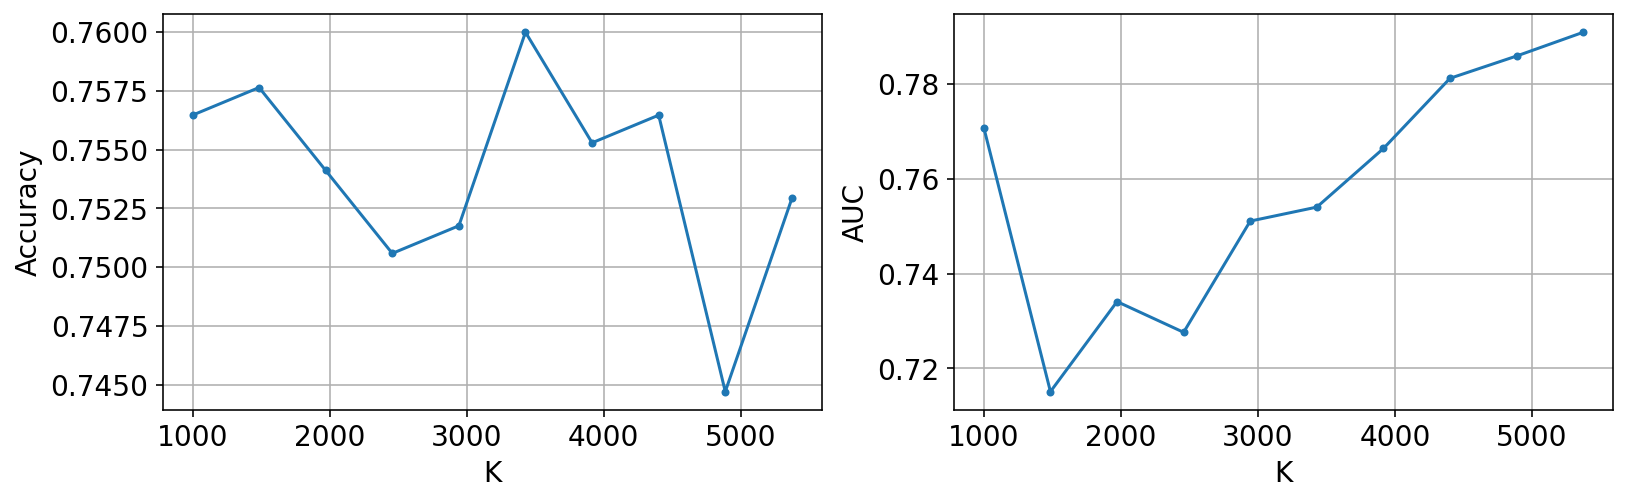

In [434]:
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 14})

df_eval_score_01 = pd.DataFrame(eval_score_01, columns = ['K', 'Accuracy', 'AUC'])

plt.figure(figsize=(13, 8))

plt.subplot(221)
plt.plot(df_eval_score_01.iloc[:, 0], df_eval_score_01.iloc[:, 1], marker='.')
plt.grid(True)
plt.xlabel(df_eval_score_01.columns[0])
plt.ylabel(df_eval_score_01.columns[1])

plt.subplot(222)
plt.plot(df_eval_score_01.iloc[:, 0], df_eval_score_01.iloc[:, 2], marker='.')
plt.grid(True)
plt.xlabel(df_eval_score_01.columns[0])
plt.ylabel(df_eval_score_01.columns[2])


Based on above two figures, we decided to select K = 1000 for the 10% sample dataset for hyperparameter tuning

Below commented cells are the original K tuning process for the whole dataset.

In [345]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, auc, roc_curve

# K = [int(x) for x in np.linspace(1000, X_train1_std.shape[1], 10)] 
# eval_score = []

# for k_trial in K:
#     print ("Trial K value = ", k_trial)

#     skb = SelectKBest(k = k_trial) # for classification: f_classif (default), chi2; for continuous response: mutual_info_regression
#     skb.fit(X_train1_std, y_train1) # for chi2: minmax, for f_classif: standard

#     df_features = pd.DataFrame({"Names":   X_train1_ohe.columns[skb.get_support()],
#                                 "P Value": skb.pvalues_[skb.get_support()],
#                                 "Scores":  skb.scores_[skb.get_support()]})

#     # df_features = df_features.sort_values(by='Scores', ascending = False)
#     # df_features.Names.head(10)

#     X_train1_skb = X_train1_std[:, skb.get_support()]
#     X_test1_skb = X_test1_std[:, skb.get_support()]

#     print ("Shape of X_train1: ",  X_train1_skb.shape)
#     print ("Shape of X_test1: ", X_test1_skb.shape)

#     model_baseRF = RandomForestClassifier()
#     model_baseRF.fit(X_train1_skb, y_train1)

#     y_pred_RF = model_baseRF.predict(X_test1_skb)
#     print ("The accuracy score of Random Forest: {:.2f}".format(accuracy_score(y_test1, y_pred_RF)))
    
#     y_pred_prob_RF = model_baseRF.predict_proba(X_test1_skb)
#     fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
#     print ("AUC for the Random Forest is {:.2f}".format(auc(fpr, tpr)))
#     eval_score.append([k_trial, accuracy_score(y_test1, y_pred_RF), auc(fpr, tpr)])
#     print ()

Trial K value =  1000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 1000)
Shape of X_test1:  (8495, 1000)
The accuracy score of Random Forest: 0.84
AUC for the Random Forest is 0.87

Trial K value =  2559


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 2559)
Shape of X_test1:  (8495, 2559)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.88

Trial K value =  4118


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 4118)
Shape of X_test1:  (8495, 4118)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.88

Trial K value =  5678


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 5678)
Shape of X_test1:  (8495, 5678)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.88

Trial K value =  7237


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 7237)
Shape of X_test1:  (8495, 7237)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.87

Trial K value =  8796


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 8796)
Shape of X_test1:  (8495, 8796)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.87

Trial K value =  10356


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 10356)
Shape of X_test1:  (8495, 10356)
The accuracy score of Random Forest: 0.85
AUC for the Random Forest is 0.88

Trial K value =  11915


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 11915)
Shape of X_test1:  (8495, 11915)
The accuracy score of Random Forest: 0.86
AUC for the Random Forest is 0.89

Trial K value =  13474


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 13474)
Shape of X_test1:  (8495, 13474)
The accuracy score of Random Forest: 0.87
AUC for the Random Forest is 0.90

Trial K value =  15034


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Shape of X_train1:  (33977, 15034)
Shape of X_test1:  (8495, 15034)
The accuracy score of Random Forest: 0.88
AUC for the Random Forest is 0.92



Text(0, 0.5, 'AUC')

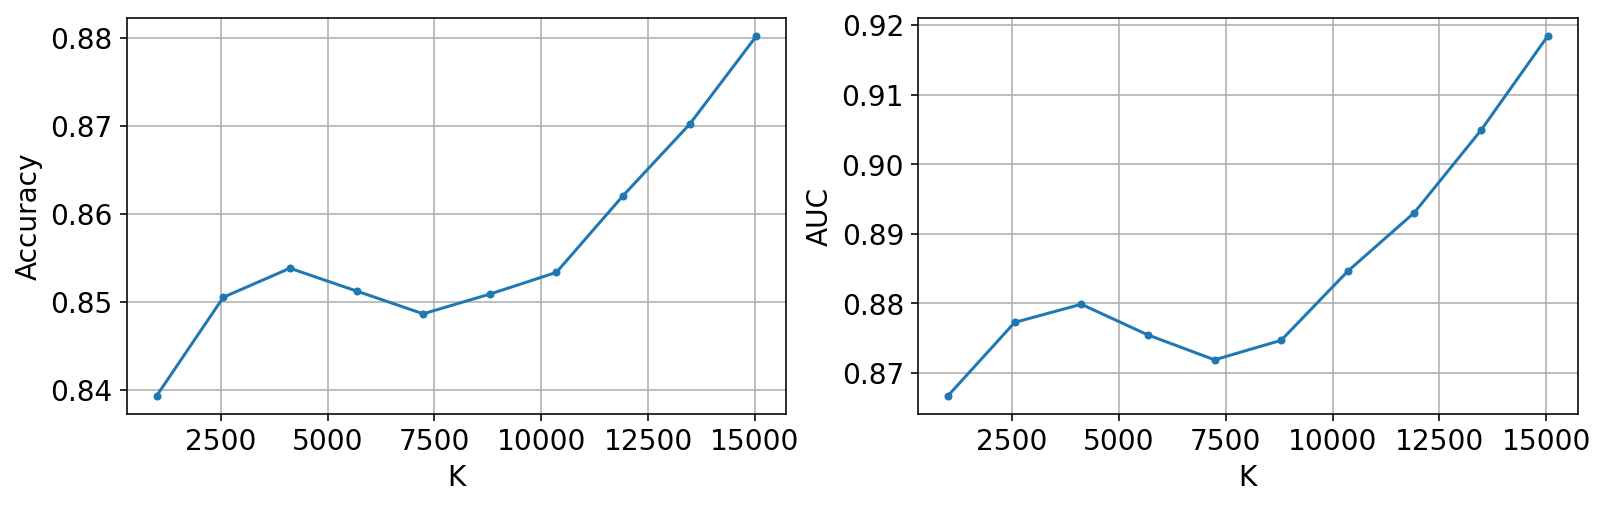

In [346]:
# import matplotlib.pyplot as plt
# %config InlineBackend.figure_format='retina'
# plt.rcParams.update({'font.size': 14})

# df_eval_score = pd.DataFrame(eval_score, columns = ['K', 'Accuracy', 'AUC'])

# plt.figure(figsize=(13, 8))

# plt.subplot(221)
# plt.plot(df_eval_score.iloc[:, 0], df_eval_score.iloc[:, 1], marker='.')
# plt.grid(True)
# plt.xlabel(df_eval_score.columns[0])
# plt.ylabel(df_eval_score.columns[1])

# plt.subplot(222)
# plt.plot(df_eval_score.iloc[:, 0], df_eval_score.iloc[:, 2], marker='.')
# plt.grid(True)
# plt.xlabel(df_eval_score.columns[0])
# plt.ylabel(df_eval_score.columns[2])


##### Decision for Select K Best

Based on above, considering computational cost and AUC performance, we selected K = 4118.

In [438]:
skb = SelectKBest(k = df_eval_score_01.iloc[0, 0]) # for classification: f_classif (default), chi2; for continuous response: mutual_info_regression
skb.fit(X_train1_std, y_train1) # for chi2: minmax, for f_classif: standard

df_features = pd.DataFrame({"Names":   X_train1_ohe.columns[skb.get_support()],
                            "P Value": skb.pvalues_[skb.get_support()],
                            "Scores":  skb.scores_[skb.get_support()]})
df_features = df_features.sort_values(by='Scores', ascending = False)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [439]:
df_features.Names.head(10)

33                        country_iso2_RU
77          country_source2_United States
45        continent_source2_North America
295    time_zone_source2_America/New_York
37                        country_iso2_US
44               continent_source2_Europe
47        continent_source2_South America
6                         country_iso2_BR
50                 country_source2_Brazil
284     time_zone_source2_America/Chicago
Name: Names, dtype: object

In [440]:
### Below are for the following training 
X_train1_skb = X_train1_std[:, skb.get_support()]
X_test1_skb = X_test1_std[:, skb.get_support()]

print (X_train1_skb.shape)
print (X_test1_skb.shape)

(3397, 1000)
(850, 1000)


In [441]:
df_features = df_features.sort_values(by='Scores', ascending = False)

for feature in df_features.Names:
    print (feature)

country_iso2_RU
country_source2_United States
continent_source2_North America
time_zone_source2_America/New_York
country_iso2_US
continent_source2_Europe
continent_source2_South America
country_iso2_BR
country_source2_Brazil
time_zone_source2_America/Chicago
organization_type_source2_cellular
connection_type_source2_Cellular
continent_source2_Asia
asn_source2_7922.0
carrier_source2_Comcast Cable Communications, LLC
time_zone_source2_America/Los_Angeles
time_zone_source2_America/Sao_Paulo
time_zone_source2_Asia/Shanghai
country_source2_China
country_source2_Republic of Korea
time_zone_source2_Asia/Seoul
country_iso2_CN
organization_source2_Comcast Cable
country_iso2_IN
country_iso2_KR
isp_source2_China Telecom Guangdong
isp_source2_Comcast Cable
asn_source2_21928.0
isp_source2_T-Mobile USA
carrier_source2_T-Mobile USA, Inc.
organization_source2_T-Mobile USA
city_source2_Seoul
time_zone_source2_Asia/Kolkata
country_source2_India
city_source2_Guangzhou
connection_type_source2_Cable/DSL
is

#### PCA

##### Tuning n_components

In [95]:
n_components = [int(x) for x in np.linspace(1000, X_train1_std.shape[1], 10)] 
eval_score_pca = []

for n in n_components:
    print ("n_components value = ", n)

    pca1 = PCA(n_components = n, random_state = 812)
    X_train1_pca = pca1.fit_transform(X_train1_std) 
    X_test1_pca = pca1.transform(X_test1_std)

    print ("Shape of X_train1: ",  X_train1_pca.shape)
    print ("Shape of X_test1: ", X_test1_pca.shape)

    model_baseRF = RandomForestClassifier()
    model_baseRF.fit(X_train1_pca, y_train1)

    y_pred_RF = model_baseRF.predict(X_test1_pca)
    print ("The accuracy score of Random Forest: {:.2f}".format(accuracy_score(y_test1, y_pred_RF)))
    
    y_pred_prob_RF = model_baseRF.predict_proba(X_test1_pca)
    fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
    print ("AUC for the Random Forest is {:.2f}".format(auc(fpr, tpr)))
    eval_score_pca.append([n, accuracy_score(y_test1, y_pred_RF), auc(fpr, tpr), sum(pca1.explained_variance_ratio_) ])
    print ()

Text(0, 0.5, 'AUC')

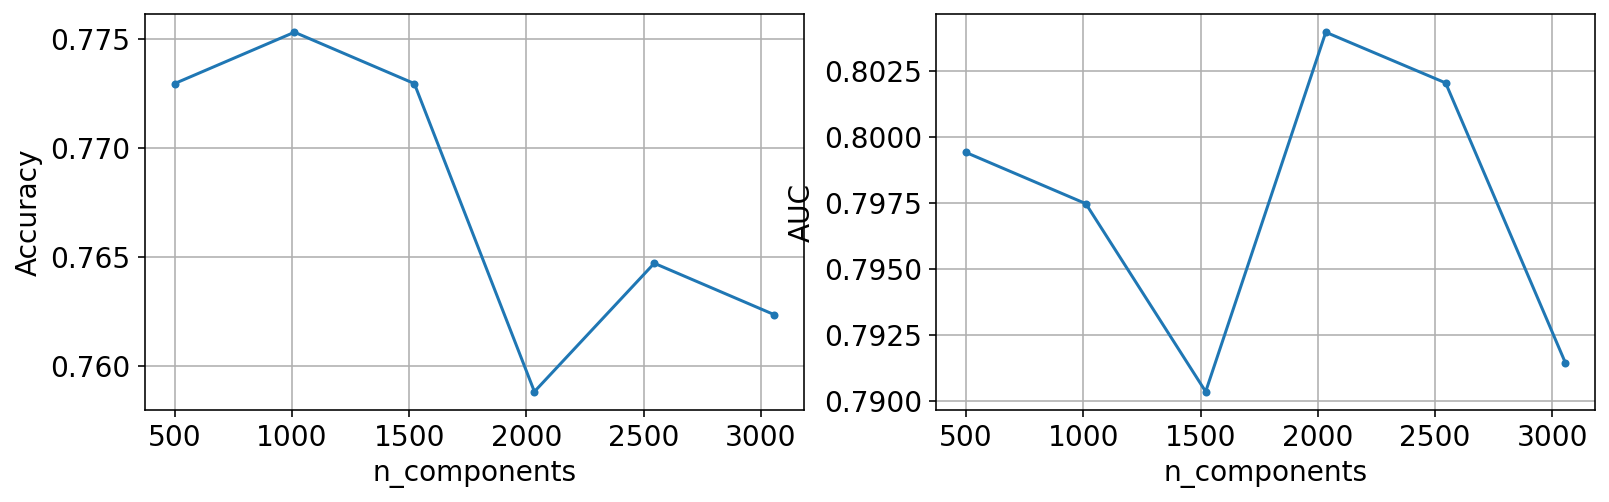

In [ ]:
df_eval_score_pca = pd.DataFrame(eval_score_pca, columns = ['n_components', 'Accuracy', 'AUC', 'Variance Expained'])

plt.figure(figsize=(13, 8))

plt.subplot(221)
plt.plot(df_eval_score_pca.iloc[:, 0], df_eval_score_pca.iloc[:, 1], marker='.')
plt.grid(True)
plt.xlabel(df_eval_score_pca.columns[0])
plt.ylabel(df_eval_score_pca.columns[1])

plt.subplot(222)
plt.plot(df_eval_score_pca.iloc[:, 0], df_eval_score_pca.iloc[:, 2], marker='.')
plt.grid(True)
plt.xlabel(df_eval_score_pca.columns[0])
plt.ylabel(df_eval_score_pca.columns[2])

plt.subplot(223)
plt.plot(df_eval_score_pca.iloc[:, 0], df_eval_score_pca.iloc[:, 3], marker='.')
plt.grid(True)
plt.xlabel(df_eval_score_pca.columns[0])
plt.ylabel(df_eval_score_pca.columns[3])


##### Decision for PCA

Based on above, considering computational cost and AUC performance, we selected n_components = 2034.

In [202]:
pca1 = PCA(n_components = 2034, random_state = 812)
X_train1_pca = pca1.fit_transform(X_train1_std) 
X_test1_pca = pca1.transform(X_test1_std)

print (X_train1_pca.shape)
print (X_test1_pca.shape)

(3397, 2034)
(850, 2034)


In [203]:
sum(pca1.explained_variance_ratio_) 

0.9999999999999863

## 2. Model Training and Performance Evaluation

For the metrics of model performance, as we're dealing with the fraud detection topic, the costs of having a False-Positive and a False-Negative are usually not the same. In such case, accuracy score might not appropriately reflects the performance of our models. Thus, though still having it, we will more focus on the AUC value, which is composed of TP and FP rates.. 

In [203]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
# import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, auc, roc_curve

from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.utils.fixes import loguniform

import optuna
from optuna.integration import LightGBMPruningCallback
from optuna.visualization.matplotlib import plot_param_importances

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
plt.rcParams.update({'font.size': 14})

### 2-1 Logistic Regression

We first tried Logistic Regression, and we found the default solver, lbfgs, failed to converge. Thus, we switched to saga and had a AUC of 0.88. This could be treated as our baseline performance.

Training history:

- Whole feature space: 
    - The accuracy score of Logistic Regression: 0.84
    - AUC for the Logistic Regression is 0.88
<br></br>
- Select K Best 1000:
    - The accuracy score of Logistic Regression: 0.81
    - AUC for the Logistic Regression is 0.84

In [295]:
model_baseLR = LogisticRegression(solver='saga') # lbfgs failed to converge
model_baseLR.fit(X_train1_std, y_train1)

y_pred_LR = model_baseLR.predict(X_test1_std)
print ("The accuracy score of Logistic Regression: {:.5f}".format(accuracy_score(y_test1, y_pred_LR)))

y_pred_prob_LR = model_baseLR.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_LR[:,1])
print ("AUC for the Logistic Regression is {:.5f}".format(auc(fpr, tpr)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


The accuracy score of Logistic Regression: 0.84049
AUC for the Logistic Regression is 0.88240


### 2-2 Random Forest

Random Forest achieved an acceptable performance of AUC = 0.92. However, the time for a training round already costed nearly 5 minutes, and this has caused our concern on the computation costs we will have in the hyperparameter tuning of Random Forest.

Training history:

- Whole feature space: 
    - The accuracy score of RF: 0.88
    - AUC for the RF is 0.92
    - Time: 4:45
- Select K Best 4118:
    - The accuracy score of RF: 0.85
    - AUC for the RF is 0.88
    - Time: 1:15
- Select K Best 4118 + sample only 10% data:
    - The accuracy score of RF: 0.76
    - AUC for the RF is 0.78
    - Time: 1.4s

In [204]:
model_baseRF = RandomForestClassifier()
model_baseRF.fit(X_train1_std, y_train1)

y_pred_RF = model_baseRF.predict(X_test1_std)
print ("The accuracy score of Random Forest: {:.5f}".format(accuracy_score(y_test1, y_pred_RF)))

y_pred_prob_RF = model_baseRF.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
print ("AUC for the Random Forest is {:.5f}".format(auc(fpr, tpr)))

The accuracy score of Random Forest: 0.88205
AUC for the Random Forest is 0.92152


Using the dataset with suffix _skb, which means after conducting Select K Best

In [442]:
model_baseRF_skb = RandomForestClassifier()
model_baseRF_skb.fit(X_train1_skb, y_train1)

y_pred_RF = model_baseRF_skb.predict(X_test1_skb)
print ("The accuracy score of Random Forest: {:.2f}".format(accuracy_score(y_test1, y_pred_RF)))

y_pred_prob_RF = model_baseRF_skb.predict_proba(X_test1_skb)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
print ("AUC for the Random Forest is {:.2f}".format(auc(fpr, tpr)))

The accuracy score of Random Forest: 0.76
AUC for the Random Forest is 0.78


#### Trimmed Random Forest

As the feature dimension of this dataset is too high, and it has costed the training time to increase significantly. We tried to tuned with 10% sample of dataset and 4118 features from Select K Best. However, the AUC result is not satisfying.

- Tuning key tree hyperparamters
    - Number of estimators 
        - Usually bigger the forest the better, there is small chance of overfitting here
    - Max depth of each tree (default none, leading to full tree) 
        - Reduction of the maximum depth helps fighting with overfitting
    - Max features per split (default sqrt(d)) 
        - Might need to play around a bit as it significantly alters behaviour of the whole tree. sqrt heuristic is usually a good starting point but an actual sweet spot might be somewhere else
<br></br>
- RandomSearchCV

In [359]:
# For RandomSeachCV, we will need to combine training and validation sets then
# specify which portion is training and which is validation
X_train_plus_valid_std = np.concatenate((X_train2_std, X_valid2_std), axis=0)
y_train_plus_valid = np.concatenate((y_train2, y_valid2), axis=0)

# Create a predefined train/test split for RandomSearchCV (to be used later)
validation_fold = np.concatenate((-1*np.ones(len(y_train2)), np.zeros(len(y_valid2))))
train_val_split = PredefinedSplit(validation_fold)

In [446]:
n_estimators = [int(x) for x in np.linspace(100, 500, 10)] 
max_depth = [int(x) for x in np.linspace(20, 40, 10)]
# feature_number = X_train1_std.shape[1]
feature_number = X_train1_skb.shape[1]
max_features = [int(x) for x in np.linspace(int(np.sqrt(feature_number)), feature_number, 10)]
# max_features = [int(x) for x in np.arange(1, feature_number, np.sqrt(feature_number))]

#turn the arrays into a dist dictionary
distributions = {'n_estimators': n_estimators,
                'max_depth': max_depth,
                'max_features': max_features
                }

model_RF = RandomForestClassifier(n_jobs = -1, random_state = 812)
# train-val split on 50 combinations of random forest parameters
rs_RF = RandomizedSearchCV(estimator = model_RF, 
                            param_distributions = distributions, 
                            n_iter = 50, 
                            # cv = train_val_split,
                            cv = 2,
                            random_state = 812, 
                            n_jobs = -1)

# rs_RF.fit(X_train_plus_valid_std, y_train_plus_valid)
rs_RF.fit(X_train1_skb, y_train1)
rs_RF.best_params_ #get the best combination of parameters

{'n_estimators': 144, 'max_features': 138, 'max_depth': 20}

In [448]:
model_trimmedRF = RandomForestClassifier(n_jobs = -1, 
                                    random_state = 812, 
                                    n_estimators= rs_RF.best_params_['n_estimators'], 
                                    max_features = rs_RF.best_params_['max_features'], 
                                    max_depth= rs_RF.best_params_['max_depth']
                                    )

model_trimmedRF.fit(X_train1_skb, y_train1)

y_pred_RF = model_trimmedRF.predict(X_test1_skb)
print ("The accuracy score of Trimmed Random Forest: {:.5f}".format(accuracy_score(y_test1, y_pred_RF)))

y_pred_prob_RF = model_trimmedRF.predict_proba(X_test1_skb)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_RF[:,1])
print ("AUC for the Trimmed Random Forest is {:.5f}".format(auc(fpr, tpr)))

The accuracy score of Trimmed Random Forest: 0.77
AUC for the Trimmed Random Forest is 0.81


### 2-3 LGBM

In [296]:
model_baseLGBM = LGBMClassifier(objective='binary', random_state=812)
model_baseLGBM.fit(X_train1_std, y_train1)

y_pred_LGBM = model_baseLGBM.predict(X_test1_std)
print ("The accuracy score of LGBM: {:.5f}".format(accuracy_score(y_test1, y_pred_LGBM)))

y_pred_prob_LGBM = model_baseLGBM.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_LGBM[:,1])
print ("AUC for the LGBM is {:.5f}".format(auc(fpr, tpr)))

The accuracy score of LGBM: 0.81366
AUC for the LGBM is 0.85503


#### Trimmed LGBM

LGBM has the lowest training time for a round, rough 2.5 minutes, so we decided to also try its hyperparameter-tuning to see if we could have a better AUC performance. We applied two methods:

- RandomSearchCV
- Optuna (with StratifiedKFold)


##### RandomizedSearchCV

In [ ]:
model_trimmedLGBM = LGBMClassifier(objective='binary', 
                                    random_state=812, 
                                    learning_rate = 0.05, 
                                    max_bin = 150, 
                                    n_estimators = 1000, 
                                    num_leaves = 200
                                    )

model_trimmedLGBM.fit(X_train1_std, y_train1)

y_pred_LGBM = model_trimmedLGBM.predict(X_test1_std)
print ("The accuracy score of trimmed LGBM: {:.5f}".format(accuracy_score(y_test1, y_pred_LGBM)))

y_pred_prob_LGBM = model_trimmedLGBM.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_LGBM[:,1])
print ("AUC for the trimmed LGBM is {:.5f}".format(auc(fpr, tpr)))

The accuracy score of trimmed LGBM: 0.85180
AUC for the trimmed LGBM is 0.89067


In [82]:
n_estimators = [int(x) for x in np.linspace(500, 1000, 5)]
# learning_rate = loguniform(1e-2, 3e-1) # Use small learning_rate with large num_iterations
num_leaves = [int(x) for x in np.linspace(100, 300, 5)] # Use large num_leaves (may cause over-fitting)
# max_bin = [int(x) for x in np.linspace(100, 200, 5)] # Use large max_bin (may be slower)
max_depth = [int(x+3) for x in np.arange(9)]
# boosting_type = ['gbdt', 'dart']
early_stopping_rounds = [5]

#turn the arrays into a grid dictionary
distribution_lgbm = {
                    'n_estimators': n_estimators, 
                    #  'learning_rate': learning_rate,
                     'early_stopping_rounds': early_stopping_rounds,
                     'num_leaves': num_leaves,
                    #  'max_bin': max_bin,
                     'max_depth': max_depth,
                    #  'boosting_type': boosting_type
                     }

model_LGBM = LGBMClassifier(objective='binary', 
                           n_jobs = -1, 
                           random_state=812)

rs_LGBM = RandomizedSearchCV(estimator = model_LGBM, 
                            param_distributions = distribution_lgbm, 
                            scoring = 'roc_auc',
                            n_iter = 10, 
                            cv = 2, 
                            verbose=2,
                            random_state = 812, 
                            n_jobs = -1)
rs_LGBM.fit(X_train2_std, y_train2, 
            eval_metric="auc",
            eval_set=[(X_valid2_std, y_valid2)])

rs_LGBM.best_params_ #get the best combination of parameters

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5

[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] early_stopping_round is set=5, early_stopping_rounds=5 will be ignored. Current value: early_stopping_round=5
[LightGBM] [Warning] e

{'num_leaves': 300,
 'n_estimators': 1000,
 'max_depth': 9,
 'early_stopping_rounds': 5}

In [84]:
model_trimmedLGBM_2 = LGBMClassifier(objective="binary", 
                                    n_jobs = -1, 
                                    random_state = 0, 
                                    n_estimators= rs_LGBM.best_params_['n_estimators'],
                                    # learning_rate = rs_LGBM.best_params_['learning_rate'], 
                                    early_stopping_rounds = rs_LGBM.best_params_['early_stopping_rounds'], 
                                    num_leaves = rs_LGBM.best_params_['num_leaves'],
                                    # max_bin= rs_LGBM.best_params_['max_bin'], 
                                    max_depth = rs_LGBM.best_params_['max_depth'],
                                    # boosting_type = rs_LGBM.best_params_['boosting_type']
                                   )

model_trimmedLGBM_2.fit(X_train1_std, y_train1, 
                        eval_metric="auc",
                        eval_set=[(X_test1_std, y_test1)])

y_pred_LGBM = model_trimmedLGBM_2.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_LGBM[:,1])
print ("AUC for the trimmed LGBM - RandomSearchCV is {:.5f}".format(auc(fpr, tpr)))

[1]	valid_0's auc: 0.793924	valid_0's binary_logloss: 0.5052
[2]	valid_0's auc: 0.802915	valid_0's binary_logloss: 0.488847
[3]	valid_0's auc: 0.805612	valid_0's binary_logloss: 0.475628
[4]	valid_0's auc: 0.813349	valid_0's binary_logloss: 0.463936
[5]	valid_0's auc: 0.813918	valid_0's binary_logloss: 0.454271
[6]	valid_0's auc: 0.817146	valid_0's binary_logloss: 0.445465
[7]	valid_0's auc: 0.820276	valid_0's binary_logloss: 0.438114
[8]	valid_0's auc: 0.821624	valid_0's binary_logloss: 0.431894
[9]	valid_0's auc: 0.822395	valid_0's binary_logloss: 0.426279
[10]	valid_0's auc: 0.824479	valid_0's binary_logloss: 0.421537
[11]	valid_0's auc: 0.825651	valid_0's binary_logloss: 0.417031
[12]	valid_0's auc: 0.828152	valid_0's binary_logloss: 0.412838
[13]	valid_0's auc: 0.828293	valid_0's binary_logloss: 0.409625
[14]	valid_0's auc: 0.82832	valid_0's binary_logloss: 0.406322
[15]	valid_0's auc: 0.828753	valid_0's binary_logloss: 0.403636
[16]	valid_0's auc: 0.829356	valid_0's binary_loglos

##### Optuna (with StratifiedKFold)

In [85]:
def objective(trial, X, y):
    param_grid = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        # "n_estimators": trial.suggest_categorical("n_estimators", [10000]),
        "n_estimators": trial.suggest_int("n_estimators", 500, 1500, step=5),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "num_leaves": trial.suggest_int("num_leaves", 200, 500, step=5),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 300, step=5),
        # "lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        # "lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        # "min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        # "bagging_fraction": trial.suggest_float(
        #     "bagging_fraction", 0.2, 0.95, step=0.1
        # ),
        # "bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        # "feature_fraction": trial.suggest_float(
        #     "feature_fraction", 0.2, 0.95, step=0.1
        # ),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=812)
    # cv_scores = np.empty(cv.get_n_splits(X, y))
    auc_scores = np.empty(cv.get_n_splits(X, y))

    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = LGBMClassifier(objective="binary", **param_grid)
        model.fit(
            X_train,
            y_train,
            eval_set=[(X_test, y_test)],
            # eval_metric="binary_logloss",
            eval_metric="auc",
            early_stopping_rounds=100,
            callbacks=[
                # LightGBMPruningCallback(trial, "binary_logloss")
                LightGBMPruningCallback(trial, "auc")
            ],  # Add a pruning callback
        )
        preds = model.predict_proba(X_test)
        # cv_scores[idx] = log_loss(y_test, preds)
        fpr, tpr, thresholds = roc_curve(y_test, preds[:,1])
        auc_scores[idx] = auc(fpr, tpr)

    return np.mean(auc_scores)

In [86]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train1_std, np.asarray(y_train1))
study.optimize(func, n_trials=20) # shall reduce to 10 or less

[I 2022-08-14 19:31:42,320] A new study created in memory with name: LGBM Classifier
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=295, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=295


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=210, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=210


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=210, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=210


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=210, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=210


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=210, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=210


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=210, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=210


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=220, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=220


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=225, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=225


[I 2022-08-14 20:05:19,084] Trial 5 pruned. Trial was pruned at iteration 30.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-08-14 20:06:43,810] Trial 6 pruned. Trial was pruned at iteration 0.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Ve

[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=115, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=115


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=215, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=215


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=195, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=195


[I 2022-08-14 20:22:01,216] Trial 9 pruned. Trial was pruned at iteration 0.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=135, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=135


[I 2022-08-14 20:36:59,392] Trial 12 pruned. Trial was pruned at iteration 0.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-08-14 20:38:22,559] Trial 13 pruned. Trial was pruned at iteration 0.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
[I 2022-08-14 20:39:42,887] Trial 14 p

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=105, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=105


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=245, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=245


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 0 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 1 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 2 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored because this `step` 3 is already reported.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/optuna/trial/_trial.py:590: UserWarning: The reported value is ignored becau

[LightGBM] [Warning] min_data_in_leaf is set=140, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=140


[I 2022-08-14 20:58:29,015] Trial 19 pruned. Trial was pruned at iteration 1.


	Best value (auc): 0.84508
	Best params:
		n_estimators: 1410
		learning_rate: 0.2984929450895124
		num_leaves: 475
		max_depth: 9
		min_data_in_leaf: 105


/var/folders/2t/5fzjt2x13h329_bxg11ttqzh0000gn/T/ipykernel_20206/2067709940.py:7: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


<AxesSubplot:title={'center':'Hyperparameter Importances'}, xlabel='Importance for Objective Value', ylabel='Hyperparameter'>

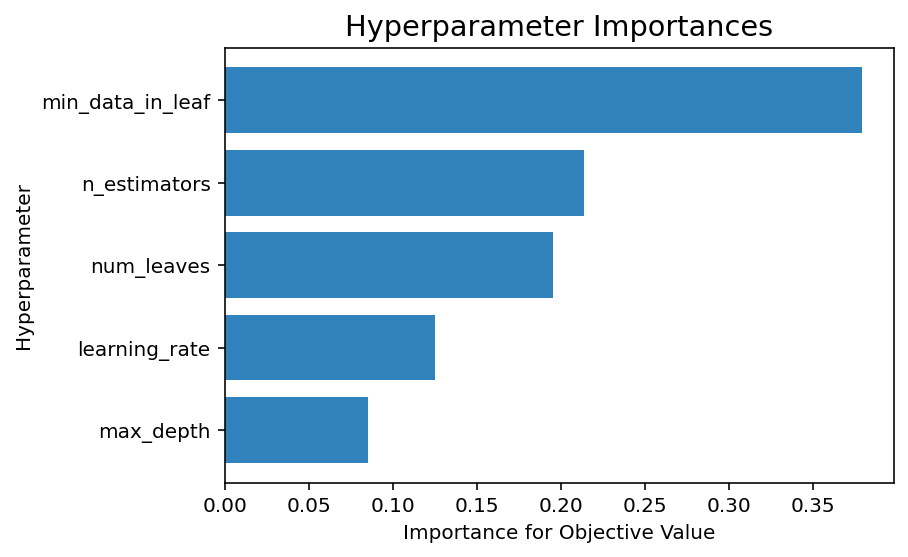

In [87]:
print(f"\tBest value (auc): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

plot_param_importances(study)

In [88]:
model_trimmedLGBM_3 = LGBMClassifier(objective="binary", 
                                    n_jobs = -1, 
                                    random_state = 0, 
                                    n_estimators= study.best_params['n_estimators'],
                                    learning_rate = study.best_params['learning_rate'], 
                                    num_leaves = study.best_params['num_leaves'],
                                    max_depth= study.best_params['max_depth'], 
                                    min_data_in_leaf = study.best_params['min_data_in_leaf'],
                                    # lambda_l1 = study.best_params['lambda_l1'], 
                                    # lambda_l2 = study.best_params['lambda_l2'],
                                    # min_gain_to_split= study.best_params['min_gain_to_split'], 
                                    # bagging_fraction = study.best_params['bagging_fraction'],
                                    # bagging_freq= study.best_params['bagging_freq'], 
                                    # feature_fraction = study.best_params['feature_fraction'],
                                )

model_trimmedLGBM_3.fit(X_train1_std, y_train1)
y_pred_LGBM = model_trimmedLGBM_3.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_LGBM[:,1])
print ("AUC for the tuned LGBM is {:.5f}".format(auc(fpr, tpr)))

AUC for the tuned LGBM is 0.86211


### 2-4 XGBoost

In [375]:
model_baseXGB = XGBClassifier()
model_baseXGB.fit(X_train1_std, y_train1, verbose = False)

y_pred_XGB = model_baseXGB.predict(X_test1_std)
print ("The accuracy score of XGBoost: {:.5f}".format(accuracy_score(y_test1, y_pred_XGB)))

y_pred_prob_XGB = model_baseXGB.predict_proba(X_test1_std)
fpr, tpr, thresholds = roc_curve(y_test1, y_pred_prob_XGB[:,1])
print ("AUC for the XGBoost is {:.5f}".format(auc(fpr, tpr)))

The accuracy score of XGBoost: 0.82084
AUC for the XGBoost is 0.85827


### 2-5 Conclusion for Q2

In the model training section, we have tried different kinds of classifiers, including: 
- Logistic Regression
- Random Forest
- LGBM
- XGBoost

The metrics used to evaluate model performance are accuracy score and AUC, especially the latter one, AUC. Though we do recognize that there are more metrics used for classification problems. However, in the condition that we have not yet known the costs of having False-Positive and False-Negative, we don't necessarily have to apply more metrics for evaluation, e.g., further applying confusion matrix and base on the costs of each situation to calculate the threshold for our classificaiton of fraud from legit.

Hyperparameter-tuning is also conducted for Random Forest (as it has the best default model performance) and LGBM (as its training time per round is the lowest). However, due to 1) the very high dimension of feature spaces, causing computational time sinificantly increases 2) no obvious effect of feature selection with Select K Best and PCA, the performance was **tentatively** not further enahnced.

Using AUC as the main performance metric, Random Forest seems to be the best for this dataset. Thus, we will use its result to proceed our next question, Q3: identifying patterns. 

# Q3. 

To try to identify specific patterns in the end-user behavior based on the IP data.

To identify specific patterns for fraud, we decide the following process:

1. T-SNE visualization
    - To see if any sign based on the clustering of the dataset in 2D. 
<br></br>
2. Feature importance
    - Based on the best performance model from Q2, we implement its feature importance and analyze these feature one-by-one.
    - Check the feature is statistically significant or not between the fraud and legit groups.

## 1. T-SNE Visualization

In [117]:
from sklearn.manifold import TSNE

In [ ]:
X_train1_std_tsne = TSNE(n_components = 2, 
                        learning_rate='auto',
                        init='random').fit_transform(X_train1_std)
X_train1_std_tsne.shape

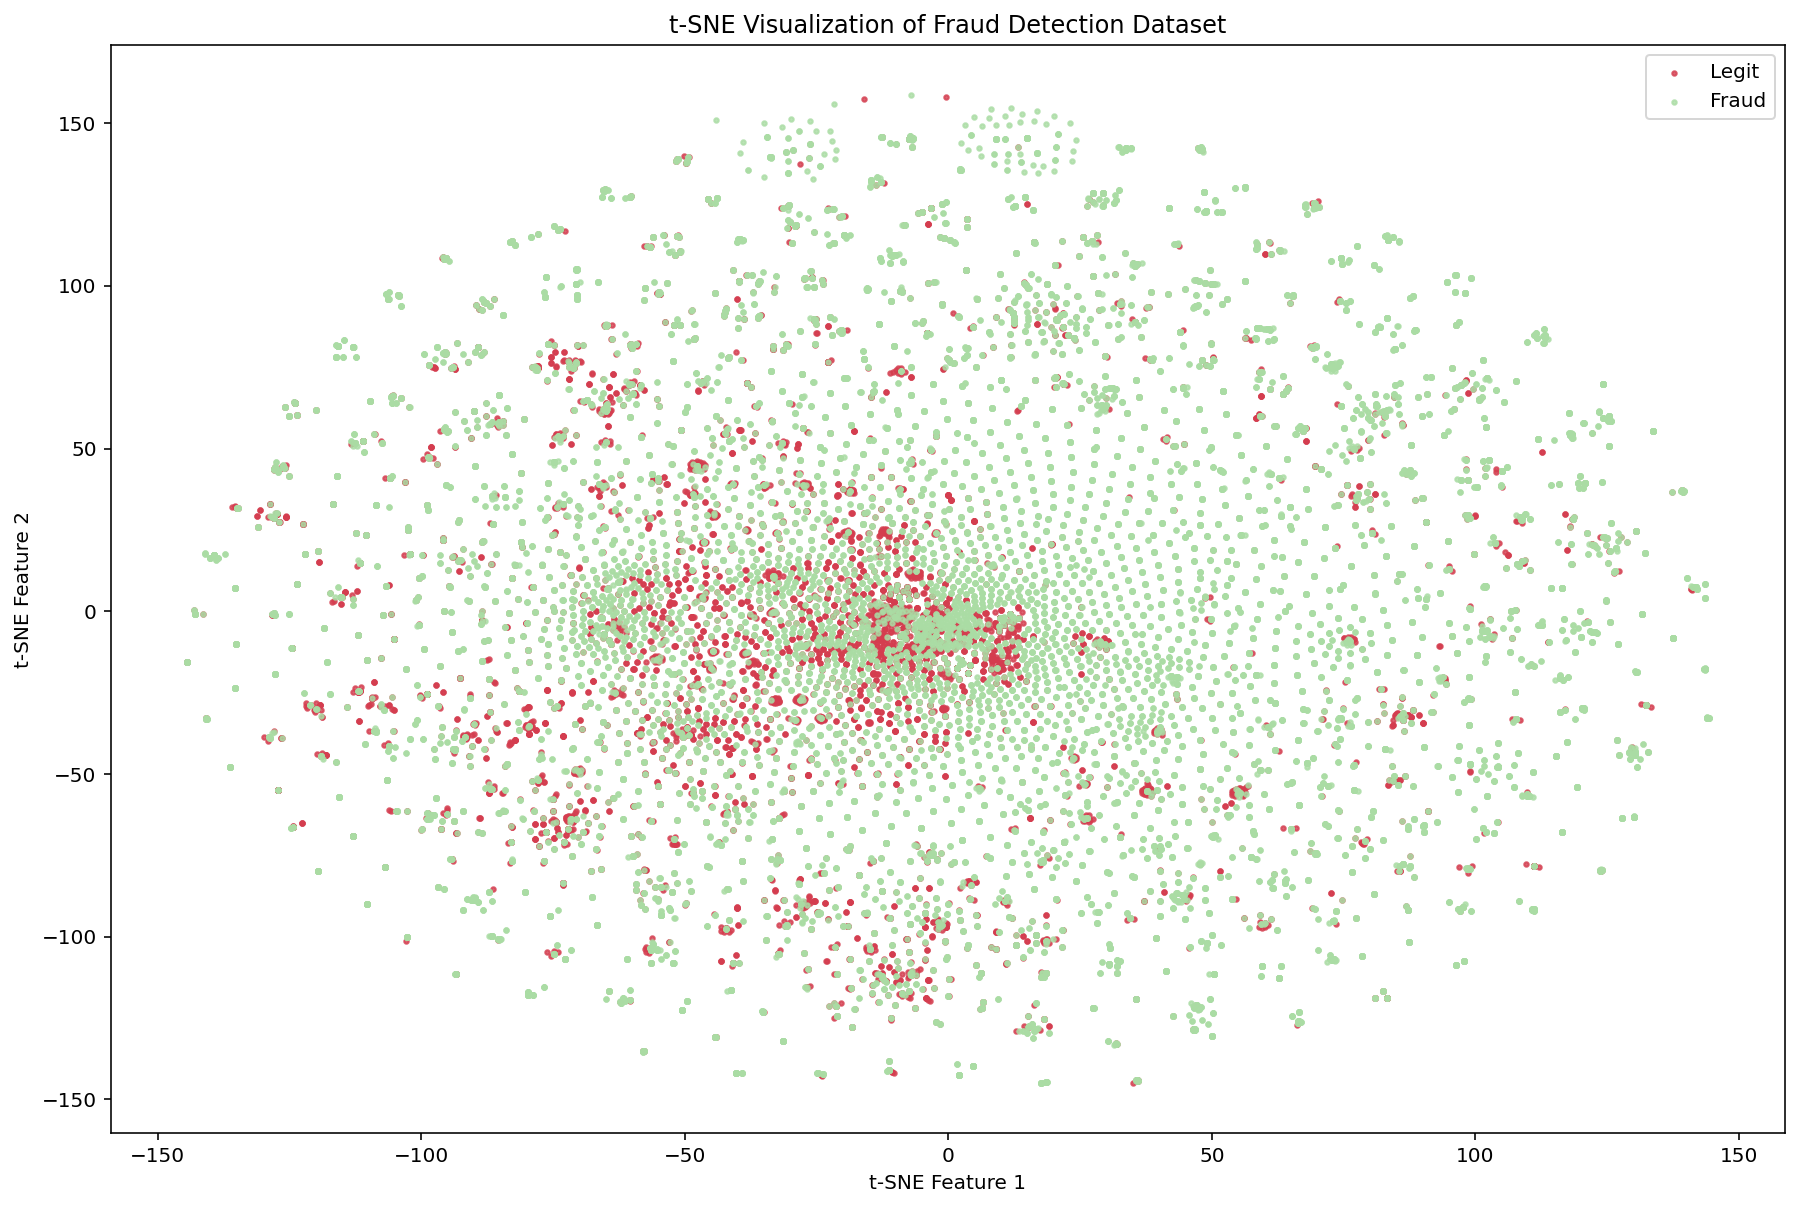

In [109]:
colors = plt.cm.Spectral(np.linspace(0.1, 0.7, len(np.unique(y_train1)))) # spectral color map divided into K colors
labels = ['Legit', 'Fraud']

fig, ax = plt.subplots(figsize=(15,10))

for i in range(len(np.unique(y_train1))):
    fraud_assignment = (y_train1 == i)
    ax.scatter(X_train1_std_tsne[fraud_assignment, 0], X_train1_std_tsne[fraud_assignment, 1], 
                s = 5, alpha = 0.8,
                color = colors[i], label = labels[i])

ax.set_xlabel("t-SNE Feature 1")
ax.set_ylabel("t-SNE Feature 2")
ax.set_title("t-SNE Visualization of Fraud Detection Dataset")
ax.legend()
plt.show()

There is few clue we can really find based on the above visulation, nor does any patterns for identifying legit and fraud. Thus, we will go with feature importance in the next section

## 2. Feature Importance

In [119]:
from scipy.stats import ttest_ind

We first only check the the top 20 features in our best model, Random Forest. 

In [205]:
importances = model_baseRF.feature_importances_ # tree-based, NN
forest_importances = pd.Series(importances, index=X_train1_ohe.columns)
forest_importances = forest_importances.sort_values(ascending=False)[:20]

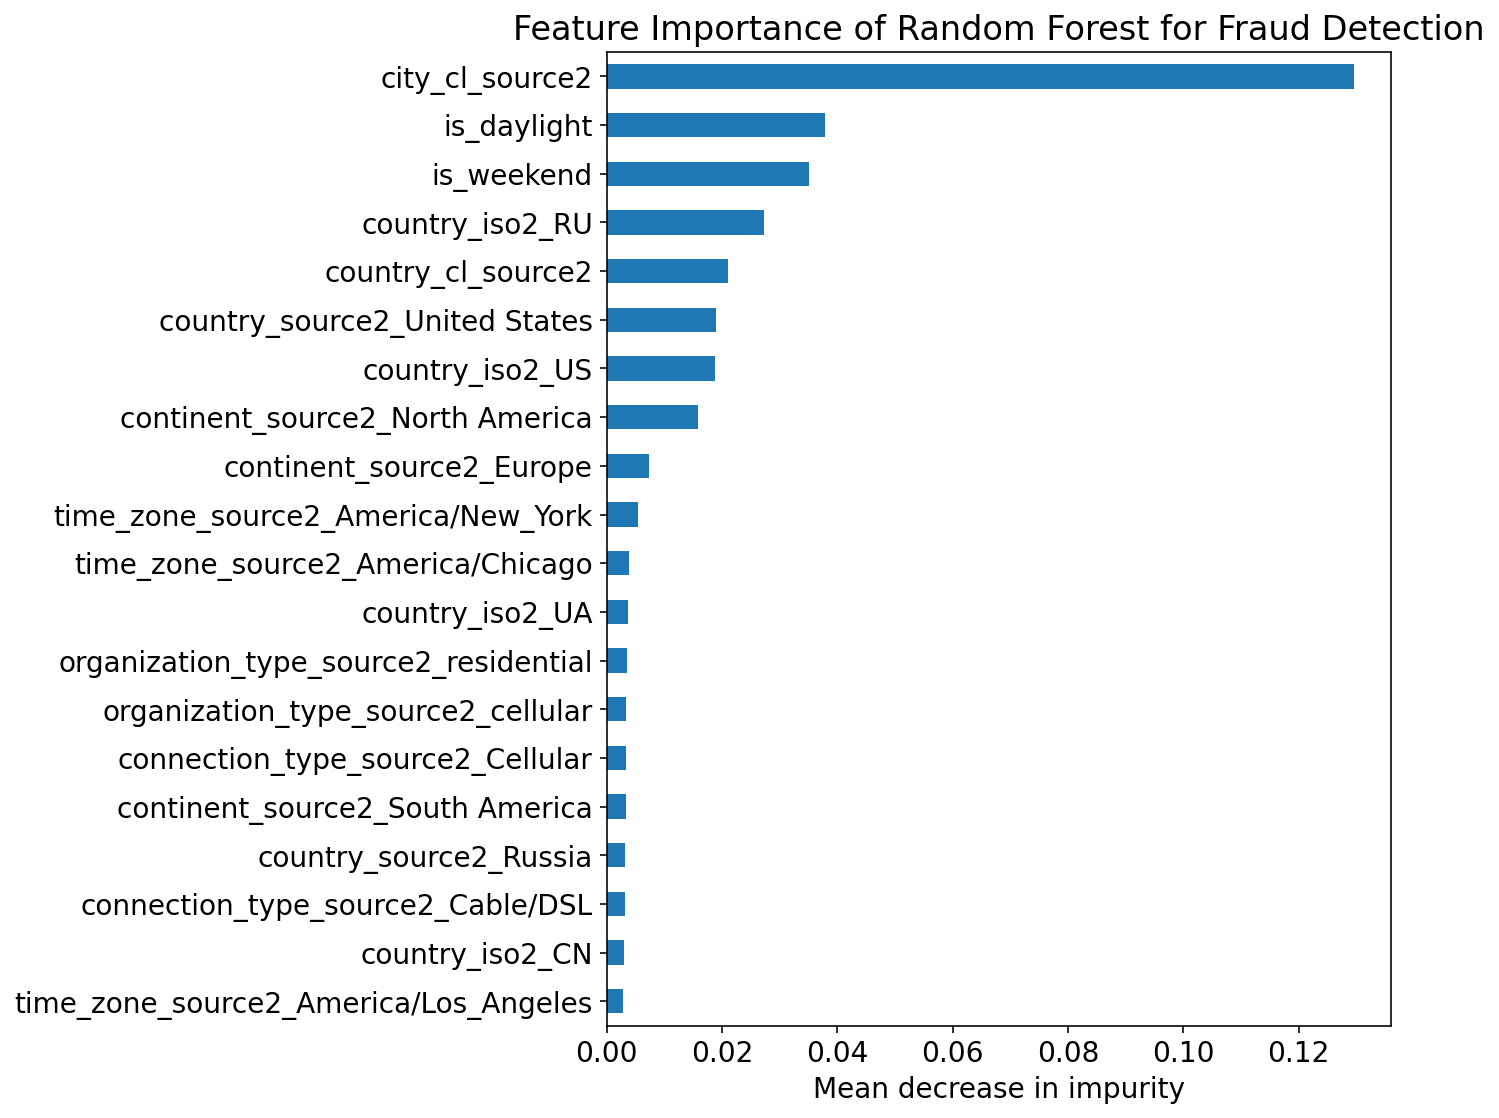

In [206]:
fig, ax = plt.subplots()
forest_importances.plot.barh( 
                            ax = ax, 
                            figsize = (10, 8)).invert_yaxis()
ax.set_title("Feature Importance of Random Forest for Fraud Detection")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()

From the above feature importance test, we found that top 10 features have obvious impact on decreasing impurity comparing with the ones starting since 11. In the list of top 10 features, it includes factors:
- Confidence interval of country and city (*city_cl_source2 and country_cl_source2*)
- The country of the phone number of the transaction (*country_iso2_RU and country_iso2_US*)
- The country of the IP address of the transaction (*country_source2_United States*)
- Timing of the transaction, whether it's in weekday, weenend, or during the day (*is_weekend, is_weekday, and is_daylight*)
- Continent of the transaction (*continent_source2_North America and continent_source2_Europe*)

### Hypothesis Testing

We then would like to know if all these top 20 features in decreasing impurity of trees are statistically significant between fraud and legit groups. We did hypothesis testing for each for them as below.

In [122]:
significant_features = []

for feature in forest_importances.index:
    ttest_stat, ttest_pval = ttest_ind(X_train1_ohe[y_train1 == 0].loc[:, feature], 
                                        X_train1_ohe[y_train1 == 1].loc[:, feature])
    if ttest_pval <= 0.01:
        significant_features.append(feature)
        
significant_features

['city_cl_source2',
 'is_daylight',
 'country_iso2_RU',
 'country_source2_United States',
 'country_iso2_US',
 'continent_source2_North America',
 'continent_source2_Europe',
 'time_zone_source2_America/New_York',
 'time_zone_source2_America/Chicago',
 'organization_type_source2_cellular',
 'country_iso2_UA',
 'continent_source2_South America',
 'connection_type_source2_Cellular',
 'organization_type_source2_residential',
 'country_iso2_BR',
 'country_source2_Russia',
 'connection_type_source2_Cable/DSL']

In [123]:
print ("The number of statistically significant features between fraud and legit groups in the top 20 features: ", len(significant_features))

The number of statistically significant features between fraud and legit groups in the top 20 features:  17


The result turns out that most of them are statistically significant between the fraud and legit groups. We then take the top 5 features to see if fraud transactions will lean to which sides of these 5 features. 

In [124]:
number_examples = 5

for idx in range(number_examples):
    print ("Feature to be checked now: ", significant_features[idx])
    print ("Statistics of legit transactions: ")
    print (X_train1_ohe[y_train1 == 0].loc[:, significant_features[idx]].describe())
    print ()
    print ("Statistics of fraud transactions: ")
    print (X_train1_ohe[y_train1 == 1].loc[:, significant_features[idx]].describe())
    print ()


Feature to be checked now:  city_cl_source2
Statistics of legit transactions: 
count    7466.000000
mean        0.453405
std         0.279861
min         0.000000
25%         0.200000
50%         0.400000
75%         0.700000
max         0.990000
Name: city_cl_source2, dtype: float64

Statistics of fraud transactions: 
count    26511.000000
mean         0.482698
std          0.269096
min          0.000000
25%          0.300000
50%          0.500000
75%          0.700000
max          0.990000
Name: city_cl_source2, dtype: float64

Feature to be checked now:  is_daylight
Statistics of legit transactions: 
count    7466.000000
mean        0.540718
std         0.498373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: is_daylight, dtype: float64

Statistics of fraud transactions: 
count    26511.000000
mean         0.626306
std          0.483793
min          0.000000
25%          0.000000
50%          1.000000
75%          1.0000

### Answers to Q3

Taking the above top 5 statistically significant features as an example, we could interpret that:

1. *city_cl_source2*: a fraud transaction's confidence level for its city is expected to be higher than the legit's.
<br></br>

2. *is_daylight*: 
    - Given a transaction is fraud, its probability of happening during the daylight, between 6am to 6pm, is expected to be higher than the probability of a transaction, given it is legit, happens during the daylight.
        - The probability of a fraud transaction happening during the daylight, between 6am to 6pm, is expected to be higher than the probability of a legit one (happening during the daylight).
    - Together with the knowledge of the prior and based on Bayes theory, instead we would infer that if a traction happens during the daylight, it's more likely to be fraud, comparing with being legit.
<br></br>

3. *country_iso2_RU*: 
    - The probability of a fraud transaction with its phone number from the country RU is expected to be higher than the probability of a legit one (with its phone number from the country RU).
    - Together with the knowledge of the prior and based on Bayes theory, we could further infer that if the phone number of a transaction is from the country RU, then it is more likely to be fraud, comparing with being legit.
<br></br>

4. *country_source2_United States*: 
    - The probability of a fraud transaction with its IP address from the country US is expected to be higher than the probability of a legit one (with its IP address from the country US).
    - Together with the knowledge of the prior and based on Bayes theory, we could further infer that if the IP address of a transaction is from the country US, then it is more likely to be fraud, comparing with being legit.
<br></br>

5. *country_iso2_US*: 
    - The probability of a fraud transaction with its phone number from the country US is expected to be lower than the probability of a legit one (with its phone number from the country US).
    - Together with the knowledge of the prior and based on Bayes theory, we could further infer that if the phone number of a transaction is from the country US, then it is less likely to be fraud, comparing with being legit.
<br></br>

Not limiting to the above interpretations, of course, we could identify more fraud patterns if we look into more features as long as they satisfy both decreasing impurity and being statistically significant between the fraud and legit groups. For example, below we extend from 18 features matching the conditions to 50.

In [102]:
forest_importances_all = pd.Series(importances, index=X_train1_ohe.columns)
forest_importances_all = forest_importances_all.sort_values(ascending=False)

In [106]:
significant_features_all = []
idx = 0
ttest_pval = 0

while (len(significant_features_all) <= 50):
    ttest_stat, ttest_pval = ttest_ind(X_train1_ohe[y_train1 == 0].loc[:, forest_importances_all.index[idx]], 
                                        X_train1_ohe[y_train1 == 1].loc[:, forest_importances_all.index[idx]])    
    if (ttest_pval <= 0.05):
        significant_features_all.append(forest_importances_all.index[idx])
    idx += 1
        
significant_features_all

['city_cl_source2',
 'country_source2_United States',
 'country_cl_source2',
 'country_iso2_US',
 'country_iso2_RU',
 'is_night',
 'is_daylight',
 'continent_source2_North America',
 'continent_source2_Europe',
 'time_zone_source2_America/New_York',
 'time_zone_source2_America/Chicago',
 'connection_type_source2_Cellular',
 'country_source2_Russia',
 'organization_type_source2_cellular',
 'organization_type_source2_residential',
 'time_zone_source2_America/Sao_Paulo',
 'connection_type_source2_Cable/DSL',
 'country_iso2_UA',
 'country_source2_China',
 'country_iso2_BR',
 'continent_source2_Asia',
 'continent_source2_South America',
 'country_source2_Brazil',
 'time_zone_source2_America/Los_Angeles',
 'time_zone_source2_Asia/Shanghai',
 'time_zone_source2_Europe/Moscow',
 'time_zone_source2_Asia/Kolkata',
 'country_iso2_CN',
 'country_iso2_NG',
 'organization_type_source2_business',
 'country_iso2_IN',
 'carrier_source2_Comcast Cable Communications, LLC',
 'country_iso2_MX',
 'proxy_is_